Import packages needed

In [7]:
#%%
#* Import the code needed
import os
from pathlib import Path
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from mpl_toolkits.mplot3d import Axes3D

Set directory path

In [8]:
#%%
#* Define paths
directory_path = Path('../../')

Import datasets

In [9]:
pop = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'Population' / 'regression_Population.xlsx',
    index_col=0)

PpD = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'PpD' / 'regression_PpD.xlsx',
    index_col=0)

UFApD = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'UFApD' / 'regression_UFApD.xlsx',
    index_col=0)

energy_intensity = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'Energy_Intensity' / 'Energy_intensity_constants.xlsx',
    index_col=[0,1,2])

TS_cj = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'Type_Split' / 'Type_Split_ratios.xlsx',
    index_col=0)

lifetime = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'Dwelling_Lifetime' / 'lifetime_regression.xlsx',
    index_col=0)

lifetime_standard_deviation = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'Dwelling_Lifetime' / 'lifetime_regression.xlsx',
    index_col=0)

In [10]:
UFApD

,UFApD SFH,UFApD TH,UFApD AB
Year,,,
1600,330.682806,123.200138,83.454020
1601,330.342699,123.154271,83.429952
1602,330.002593,123.108404,83.405885
1603,329.662486,123.062537,83.381817
1604,329.322380,123.016670,83.357749
...,...,...,...
2046,178.995294,102.743441,72.719753
2047,178.655187,102.697573,72.695685
2048,178.315080,102.651706,72.671617


Seperate out the lifetime and standard deviation datasets

In [11]:
lifetime = lifetime.drop('std_dev', axis=1)
lifetime_standard_deviation = lifetime_standard_deviation.drop('lifetime', axis=1)

lifetime = lifetime.loc[:, 'lifetime'].to_numpy()
lifetime

lifetime_standard_deviation = lifetime_standard_deviation.loc[:, 'std_dev'].to_numpy()

In [12]:
lifetime

array([150.25216652, 150.25216376, 150.25216088, 150.25215789,
       150.25215478, 150.25215154, 150.25214817, 150.25214466,
       150.25214101, 150.25213722, 150.25213326, 150.25212915,
       150.25212487, 150.25212042, 150.25211579, 150.25211097,
       150.25210595, 150.25210073, 150.25209529, 150.25208964,
       150.25208376, 150.25207764, 150.25207127, 150.25206464,
       150.25205774, 150.25205056, 150.25204309, 150.25203532,
       150.25202723, 150.25201881, 150.25201005, 150.25200094,
       150.25199146, 150.25198159, 150.25197132, 150.25196063,
       150.25194951, 150.25193794, 150.2519259 , 150.25191336,
       150.25190033, 150.25188676, 150.25187264, 150.25185794,
       150.25184265, 150.25182674, 150.25181019, 150.25179296,
       150.25177503, 150.25175638, 150.25173696, 150.25171676,
       150.25169574, 150.25167387, 150.25165111, 150.25162742,
       150.25160277, 150.25157712, 150.25155043, 150.25152266,
       150.25149376, 150.25146368, 150.25143239, 150.25

Import DSM module

In [13]:
# getting the name of the directory where the this file is present.
current = os.path.dirname(os.path.realpath('this'))
 
# Getting the parent directory name where the current directory is present.
parent = os.path.dirname(current)
#make the UA path
module_path = parent + '/modules'
#append path to options to import from
sys.path.append(module_path)

from dynamic_stock_model import DynamicStockModel

Calculate stock from pop/PpD

split up stock by type split ratios

In [14]:
pop

,Population
Year,
1600,4.000000e+05
1601,4.027813e+05
1602,4.054588e+05
1603,4.080344e+05
1604,4.105101e+05
...,...
2046,5.982917e+06
2047,5.996759e+06
2048,6.009663e+06


In [15]:
PpD

,PpD
Year,
1600,5.406318
1601,5.406302
1602,5.406287
1603,5.406270
1604,5.406254
...,...
2046,1.915802
2047,1.909925
2048,1.904177


In [16]:
stock_t = np.divide(pop,PpD)

stock_t_SFH = np.multiply(stock_t,TS_cj['SFH_ratio'])
stock_t_TH = np.multiply(stock_t,TS_cj['TH_ratio'])
stock_t_AB = np.multiply(stock_t,TS_cj['AB_ratio'])

C:\Users\grace\AppData\Local\Temp\ipykernel_26412\1861254205.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  stock_t = np.divide(pop,PpD)
C:\Users\grace\AppData\Local\Temp\ipykernel_26412\1861254205.py:3: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array 

In [17]:
stock_t

,Population
Year,
1600,7.398751e+04
1601,7.450218e+04
1602,7.499765e+04
1603,7.547429e+04
1604,7.593246e+04
...,...
2046,3.122931e+06
2047,3.139787e+06
2048,3.156042e+06


In [18]:
stock_t_TH

,Population
Year,
1600,15256.224482
1601,15362.349242
1602,15464.516179
1603,15562.799466
1604,15657.273276
...,...
2046,643948.336325
2047,647424.124812
2048,650775.783924


In [19]:
stock_t

,Population
Year,
1600,7.398751e+04
1601,7.450218e+04
1602,7.499765e+04
1603,7.547429e+04
1604,7.593246e+04
...,...
2046,3.122931e+06
2047,3.139787e+06
2048,3.156042e+06


Define a function that does all the stock modeling steps for us

In [20]:
def stock_model(stock):
    dwellings_stock_driven = DynamicStockModel(t=np.arange(1600, 2051),
                         s=stock['Population'].to_numpy(),
                         lt={'Type': 'Normal', 
                             'Mean': lifetime,
                             'StdDev': lifetime_standard_deviation 
                             }
                        )
    
    dwellings_stock_driven.compute_stock_driven_model(
        NegativeInflowCorrect = True)
    
    inflow_t = dwellings_stock_driven.i

    dwellings_inflow_driven = DynamicStockModel(t=np.arange(1600, 2051),
                    i=inflow_t,
                    lt={'Type': 'Normal', 
                        'Mean': lifetime,
                        'StdDev': lifetime_standard_deviation 
                        }
                    )
    dwellings_inflow_driven.compute_s_c_inflow_driven()

    dwellings_inflow_driven.compute_stock_total()

    dwellings_inflow_driven.compute_o_c_from_s_c()


    return dwellings_inflow_driven.s_c, dwellings_inflow_driven.s, dwellings_stock_driven.i, dwellings_stock_driven.o_c


Run the stock model function on each type, spit out:

s_c (stock by cohort)
s (total stock)
i (total)
o (outflow by cohort)


In [21]:
s_c_SFH, s_SFH, i_SFH, o_SFH = stock_model(stock_t_SFH)
s_c_TH, s_TH, i_TH, o_TH = stock_model(stock_t_TH)
s_c_AB, s_AB, i_AB, o_AB = stock_model(stock_t_AB)

In [22]:
s_SFH

array([  38636.27751903,   38905.03770149,   39163.77472594,
         39412.67643507,   39651.93067318,   39881.72528634,
         40102.24812235,   40313.6870309 ,   40516.22986361,
         40710.0644741 ,   40895.3787181 ,   41072.36045351,
         41241.19754052,   41402.07784169,   41555.18922205,
         41700.71954922,   41838.85669352,   41969.78852805,
         42093.7029289 ,   42210.78777517,   42321.23094921,
         42425.22033669,   42522.94382677,   42614.58931227,
         42700.34468985,   42780.39786011,   42854.93672788,
         42924.14920231,   42988.22319712,   43047.34663082,
         43101.70742689,   43151.49351403,   43196.89282642,
         43238.09330393,   43275.28289242,   43308.649544  ,
         43338.38121733,   43364.66587791,   43387.69149842,
         43407.64605902,   43424.71754773,   43439.09396078,
         43450.96330301,   43460.51358823,   43467.93283969,
         43473.40909048,   43477.130384  ,   43479.28477445,
         43480.0603273 ,

In [23]:
s_TH

array([ 15256.22448185,  15362.34924176,  15464.51617865,  15562.79946555,
        15657.27327616,  15748.01178484,  15835.08916666,  15918.57959742,
        15998.55725369,  16075.09631283,  16148.27095303,  16218.15535334,
        16284.82369371,  16348.35015503,  16408.80891916,  16466.274169  ,
        16520.82008848,  16572.52086267,  16621.45067778,  16667.68372126,
        16711.29418178,  16752.35624938,  16790.94411543,  16827.13197279,
        16860.99401579,  16892.60444036,  16922.03744406,  16949.36722619,
        16974.66798783,  16998.01393197,  17019.47926355,  17039.13818957,
        17057.0649192 ,  17073.33366386,  17088.01863734,  17101.19405587,
        17112.93413829,  17123.31310614,  17132.40518379,  17140.28459856,
        17147.02558089,  17152.70236445,  17157.38918629,  17161.16028704,
        17164.08991104,  17166.25230651,  17167.72172574,  17168.5724253 ,
        17168.8786662 ,  17168.71471413,  17168.15483965,  17167.27331845,
        17166.14443153,  

Plot total SFH stock

Text(0, 0.5, 'dwellings')

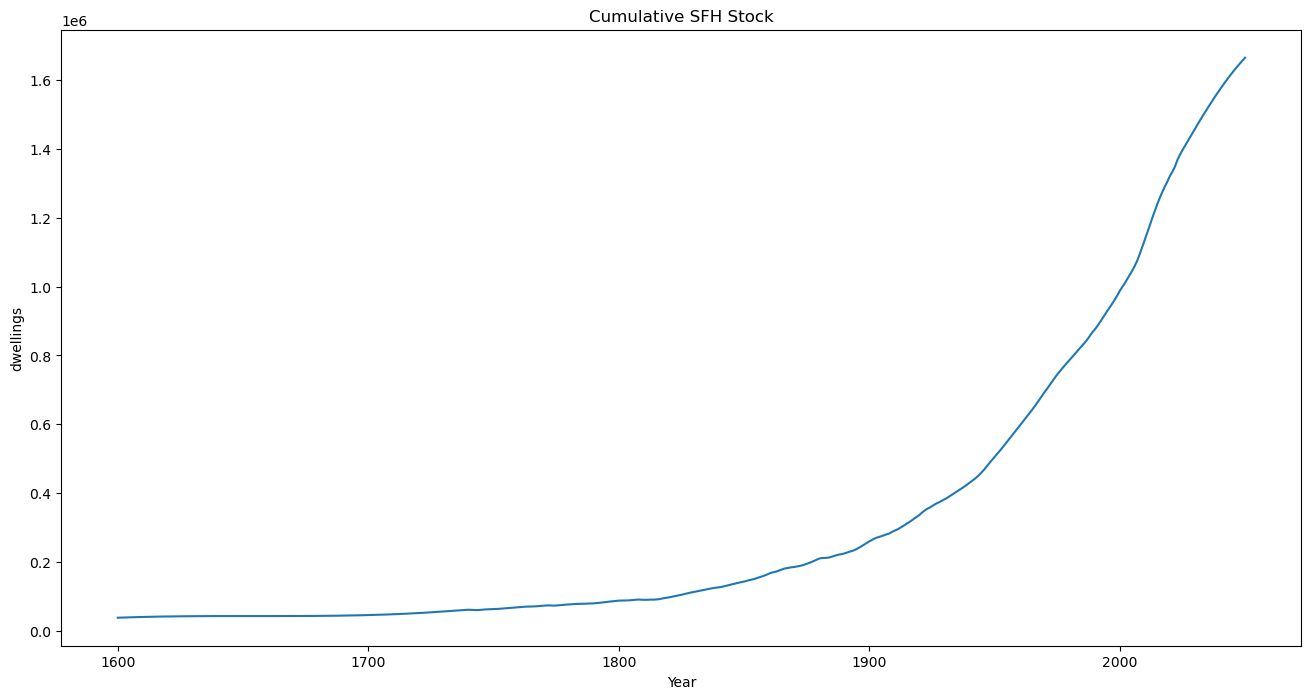

In [24]:
# Plot SFH total stock
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_SFH)
plt.title('Cumulative SFH Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

Plot total TH stock

Text(0, 0.5, 'dwellings')

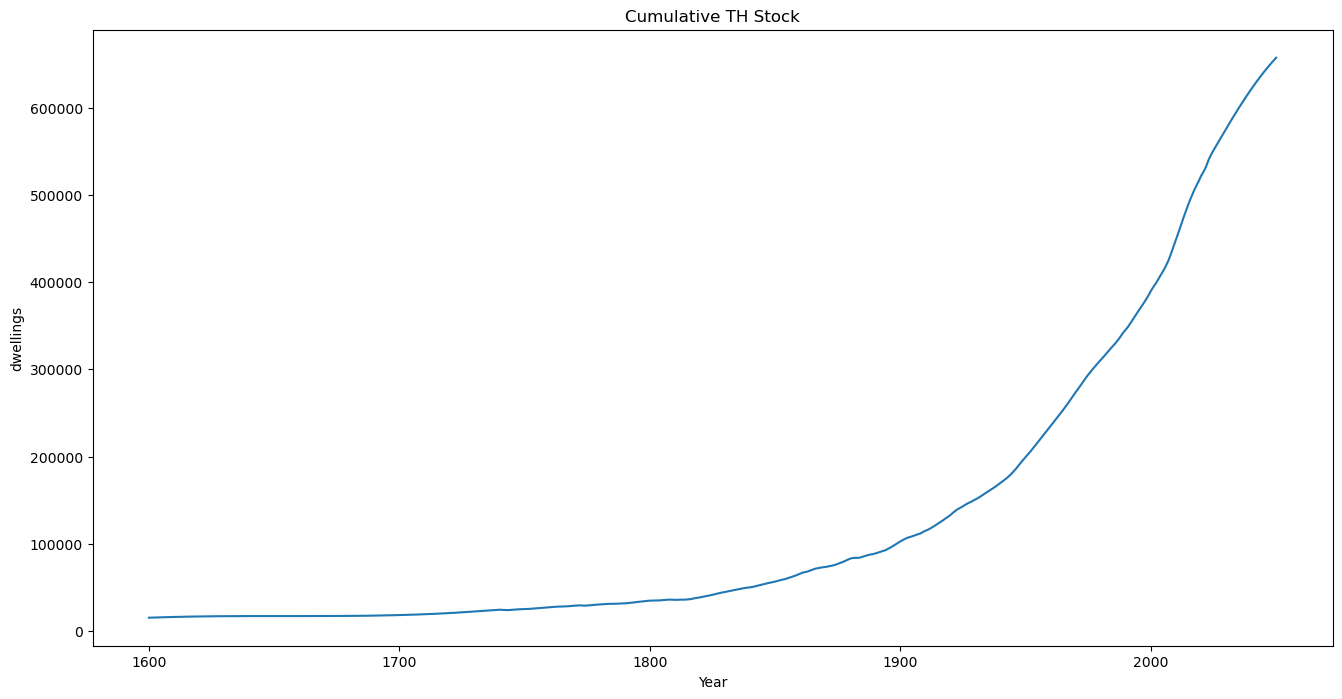

In [25]:
# Plot TH total stock
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_TH)
plt.title('Cumulative TH Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

Plot total AB stock

Text(0, 0.5, 'dwellings')

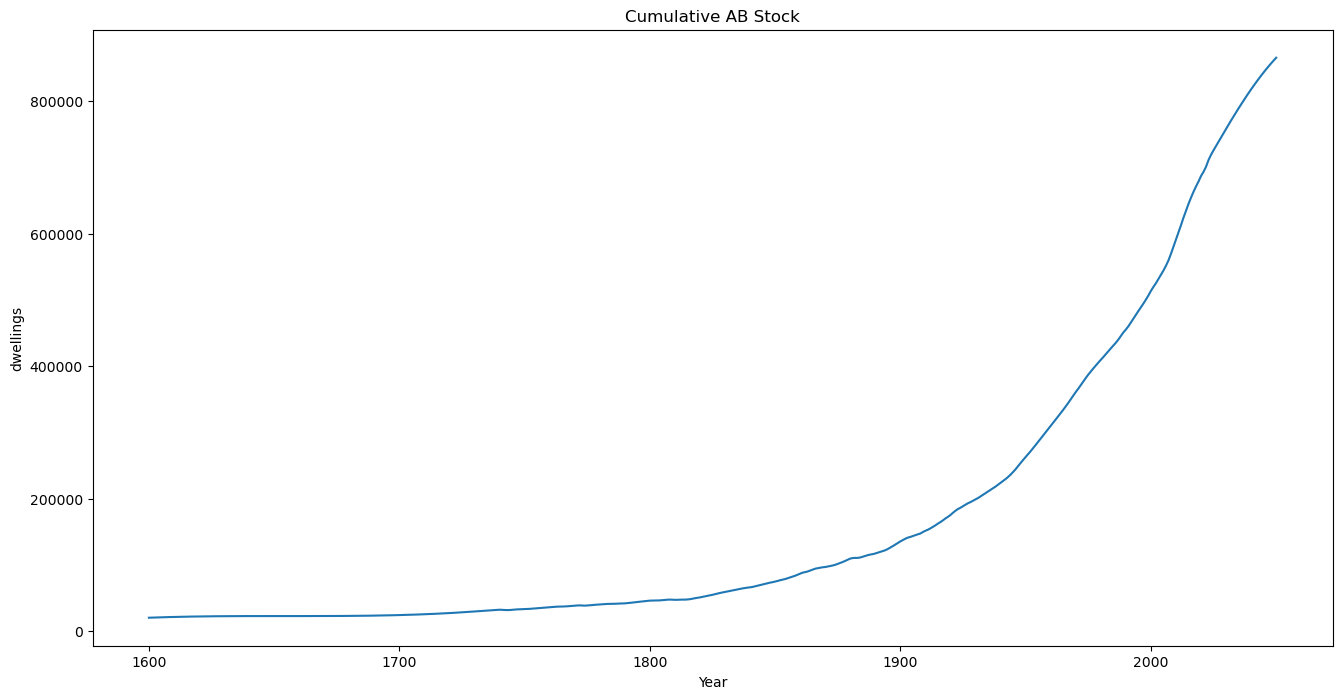

In [26]:
# Plot AB total stock
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_AB)
plt.title('Cumulative AB Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

Make s_c arrays into dataframes for easier use

Also drop duplicate years Grace found in the UFApD data

In [27]:
UFApD.drop_duplicates(inplace=True)

s_c_SFH_df = pd.DataFrame(s_c_SFH)
s_c_SFH_df = s_c_SFH_df.set_index(UFApD.index)
s_c_SFH_df.columns = np.arange(1600, 2051)
s_c_SFH_df

s_c_TH_df = pd.DataFrame(s_c_TH)
s_c_TH_df = s_c_TH_df.set_index(UFApD.index)
s_c_TH_df.columns = np.arange(1600, 2051)
s_c_TH_df

s_c_AB_df = pd.DataFrame(s_c_AB)
s_c_AB_df = s_c_AB_df.set_index(UFApD.index)
s_c_AB_df.columns = np.arange(1600, 2051)
s_c_AB_df

i_SFH_df = pd.DataFrame(i_SFH)
i_SFH_df = i_SFH_df.set_index(UFApD.index)

o_SFH_df = pd.DataFrame(o_SFH)
o_SFH_df = o_SFH_df.set_index(UFApD.index)
o_SFH_df.columns = np.arange(1600, 2051)

i_TH_df = pd.DataFrame(i_TH)
i_TH_df = i_TH_df.set_index(UFApD.index)

o_TH_df = pd.DataFrame(o_TH)
o_TH_df = o_TH_df.set_index(UFApD.index)
o_TH_df.columns = np.arange(1600, 2051)

i_AB_df = pd.DataFrame(i_AB)
i_AB_df = i_AB_df.set_index(UFApD.index)

o_AB_df = pd.DataFrame(o_AB)
o_AB_df = o_AB_df.set_index(UFApD.index)
o_AB_df.columns = np.arange(1600, 2051)

Aggregate s_c dataframes into the cohorts from tabula for each type for plotting

In [28]:
SFH_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_c_SFH_df).loc[:,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_c_SFH_df).loc[:,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_c_SFH_df).loc[:,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_c_SFH_df).loc[:,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_c_SFH_df).loc[:,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_c_SFH_df).loc[:,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_c_SFH_df).loc[:,'2011':'2050'].sum(axis=1)}
          )

TH_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_c_TH_df).loc[:,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_c_TH_df).loc[:,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_c_TH_df).loc[:,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_c_TH_df).loc[:,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_c_TH_df).loc[:,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_c_TH_df).loc[:,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_c_TH_df).loc[:,'2011':'2050'].sum(axis=1)}
          )

AB_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_c_AB_df).loc[:,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_c_AB_df).loc[:,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_c_AB_df).loc[:,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_c_AB_df).loc[:,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_c_AB_df).loc[:,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_c_AB_df).loc[:,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_c_AB_df).loc[:,'2011':'2050'].sum(axis=1)}
          )

Make a stackplot of SFH by tabula cohorts

Text(0, 0.5, 'dwellings')

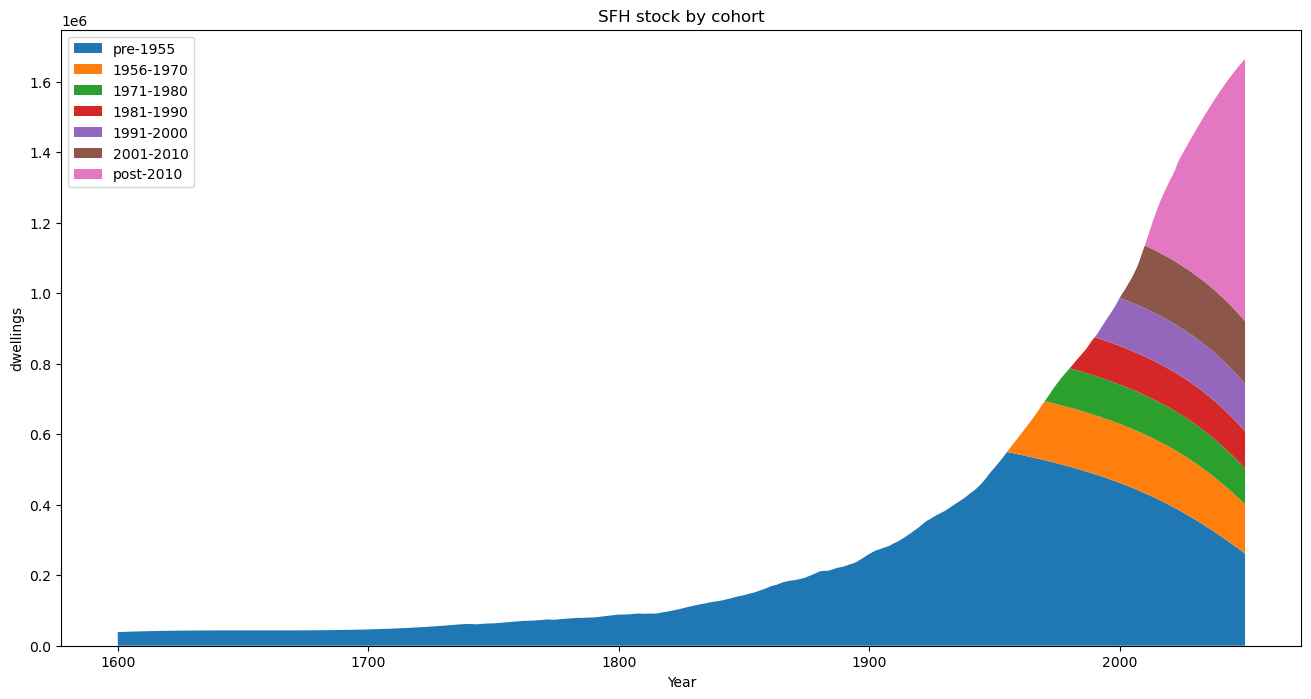

In [29]:
# Plot SFH stock by tabula cohort
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), SFH_stock_by_tabula_cohort.loc[:,'pre-1955'], 
    SFH_stock_by_tabula_cohort.loc[:,'1956-1970'],
    SFH_stock_by_tabula_cohort.loc[:,'1971-1980'],
    SFH_stock_by_tabula_cohort.loc[:,'1981-1990'],
    SFH_stock_by_tabula_cohort.loc[:,'1991-2000'],
    SFH_stock_by_tabula_cohort.loc[:,'2001-2010'],
    SFH_stock_by_tabula_cohort.loc[:,'post-2010'],
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('SFH stock by cohort')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.ylabel('dwellings')

Make a stackplot of TH by tabula cohorts

Text(0, 0.5, 'dwellings')

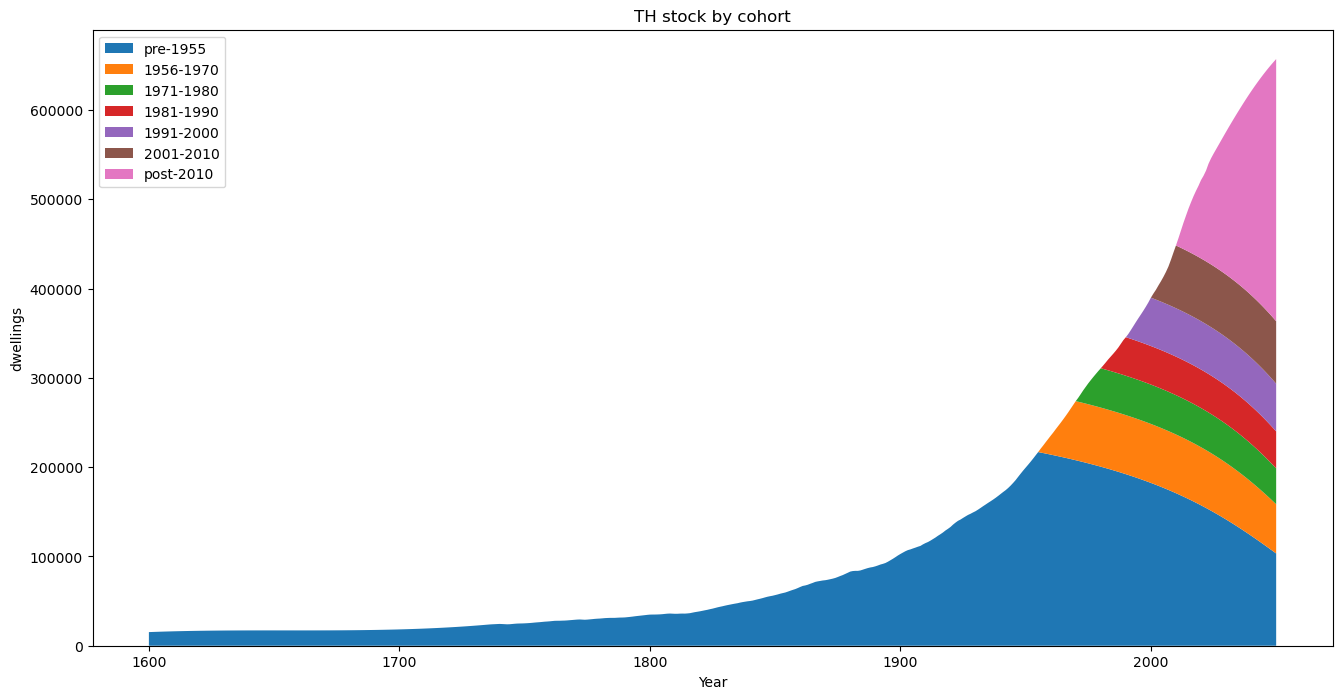

In [30]:
# Plot TH stock by tabula cohort
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), TH_stock_by_tabula_cohort.loc[:,'pre-1955'], 
    TH_stock_by_tabula_cohort.loc[:,'1956-1970'],
    TH_stock_by_tabula_cohort.loc[:,'1971-1980'],
    TH_stock_by_tabula_cohort.loc[:,'1981-1990'],
    TH_stock_by_tabula_cohort.loc[:,'1991-2000'],
    TH_stock_by_tabula_cohort.loc[:,'2001-2010'],
    TH_stock_by_tabula_cohort.loc[:,'post-2010'],
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('TH stock by cohort')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.ylabel('dwellings')

Make a stackplot of AB by tabula cohorts

Text(0, 0.5, 'dwellings')

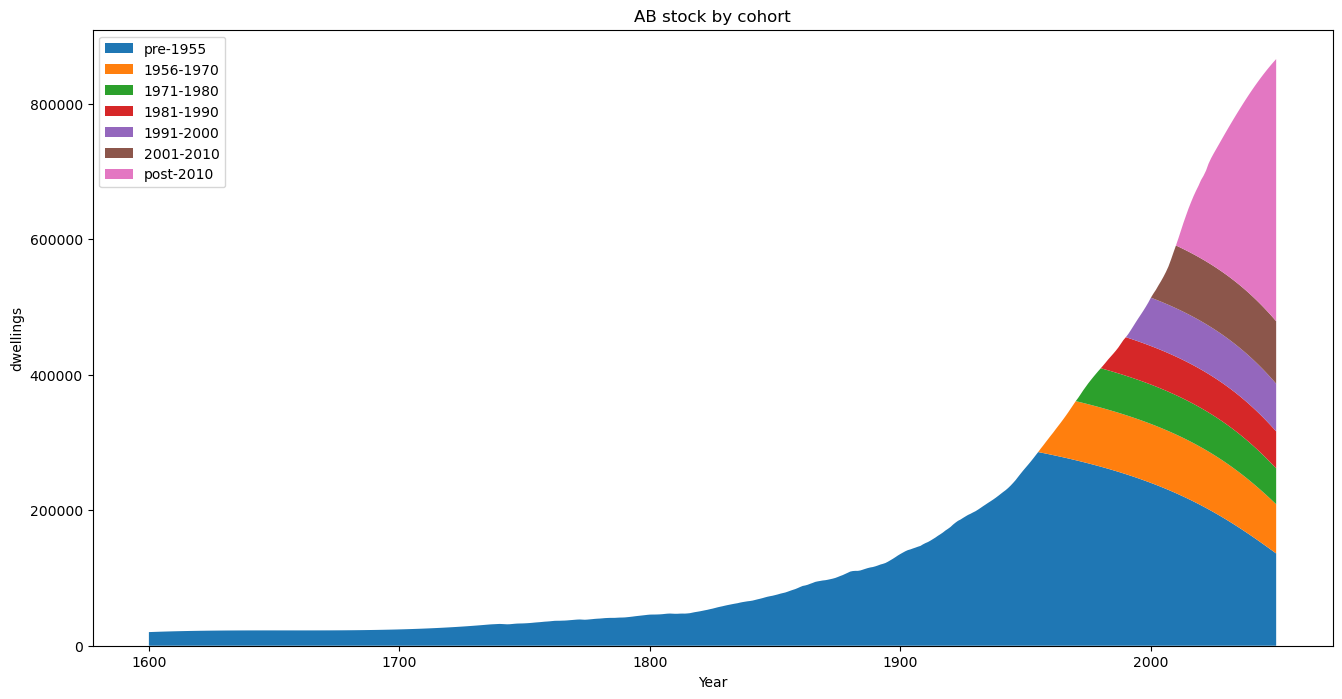

In [31]:
# Plot AB stock by tabula cohort
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), AB_stock_by_tabula_cohort.loc[:,'pre-1955'], 
    AB_stock_by_tabula_cohort.loc[:,'1956-1970'],
    AB_stock_by_tabula_cohort.loc[:,'1971-1980'],
    AB_stock_by_tabula_cohort.loc[:,'1981-1990'],
    AB_stock_by_tabula_cohort.loc[:,'1991-2000'],
    AB_stock_by_tabula_cohort.loc[:,'2001-2010'],
    AB_stock_by_tabula_cohort.loc[:,'post-2010'],
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('AB stock by cohort')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.ylabel('dwellings')

Calculate total stock (s_total), total stock by cohort (s_c_total)

Calculate stock_changes by inflow - outflow for each type and aggregated

Calculate total inflows and outflows



In [32]:
s_total = s_SFH + s_TH + s_AB

total_stock_by_tabula_cohort = SFH_stock_by_tabula_cohort + TH_stock_by_tabula_cohort + AB_stock_by_tabula_cohort

stock_change_SFH = i_SFH - o_SFH
stock_change_TH = i_TH - o_TH
stock_change_AB = i_AB - o_AB

stock_change_total = stock_change_SFH + stock_change_TH + stock_change_AB

i_total = i_SFH + i_TH + i_AB

o_total = o_SFH + o_TH + o_AB

Plot total stock change

Text(0, 0.5, 'dwellings')

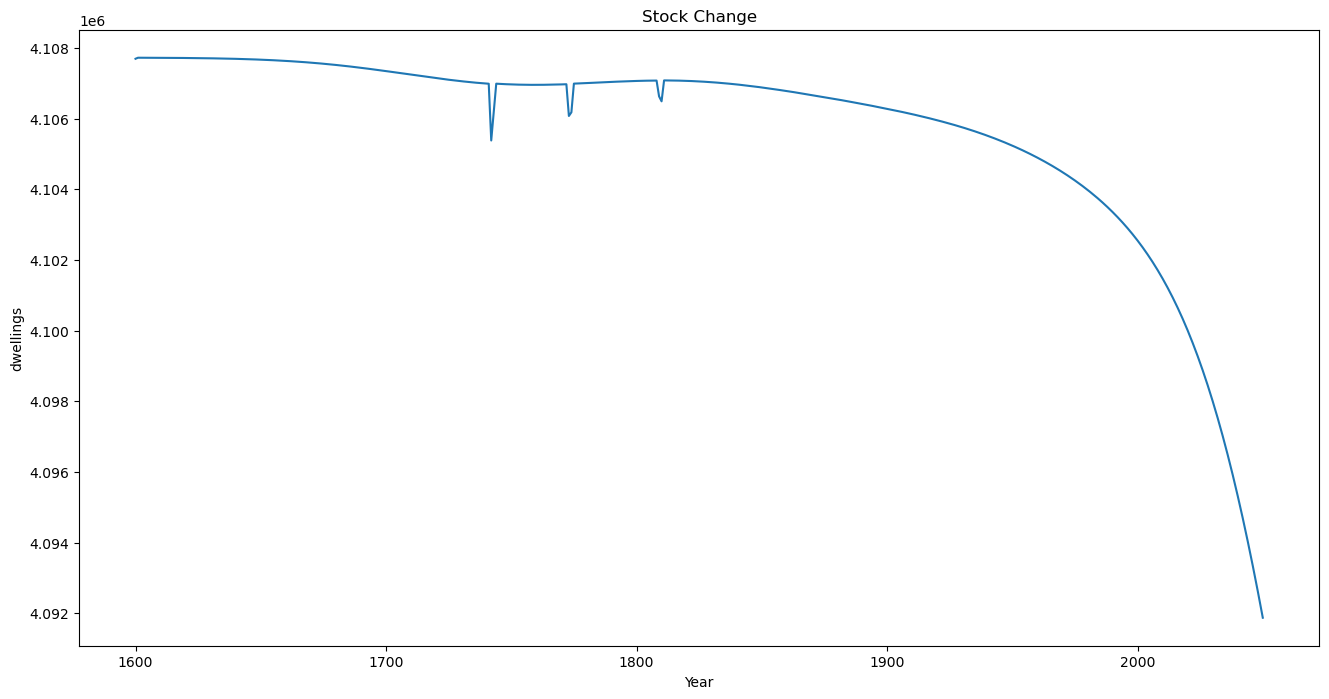

In [33]:
# Plot total stock change
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), stock_change_total.sum(axis=1))
plt.title('Stock Change')
plt.xlabel('Year')
plt.ylabel('dwellings')

Plot total stock by type

Text(0, 0.5, 'dwellings')

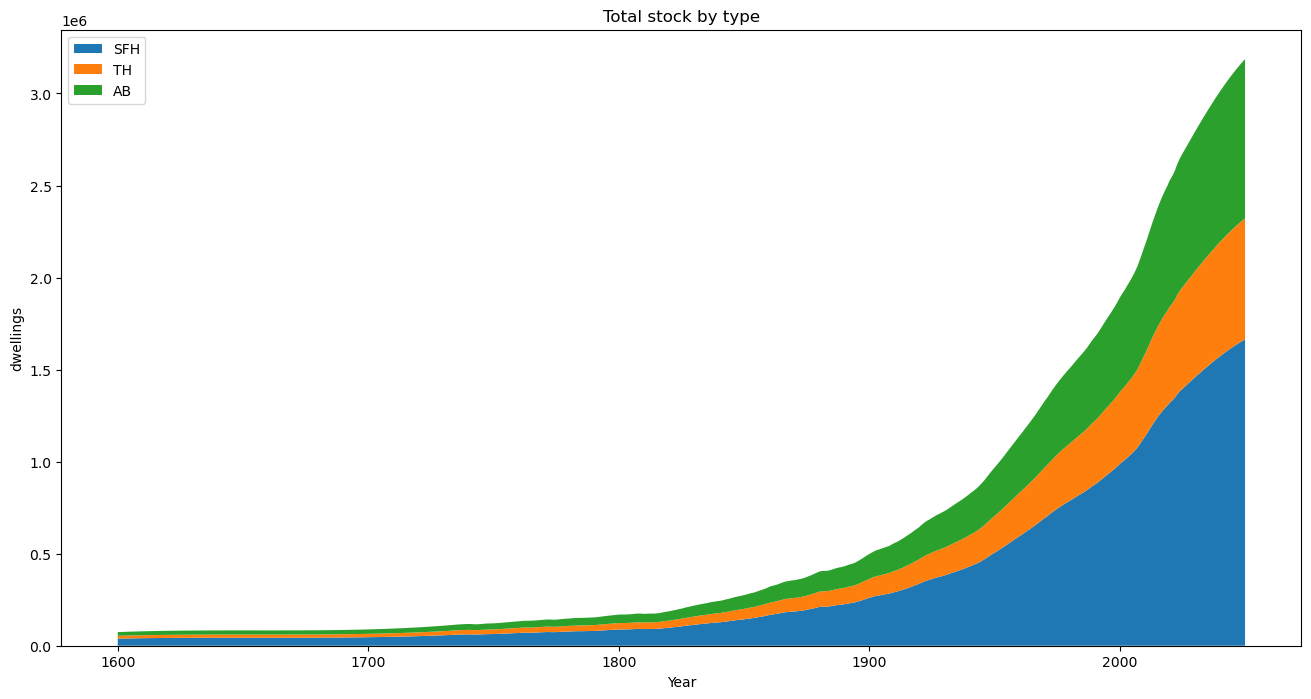

In [34]:
# Plot TH stock by tabula cohort
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), 
    s_SFH, s_TH, s_AB,
    labels=['SFH', 'TH', 'AB']
    )

plt.title('Total stock by type')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.ylabel('dwellings')

Plot total stock by cohort

Text(0, 0.5, 'dwellings')

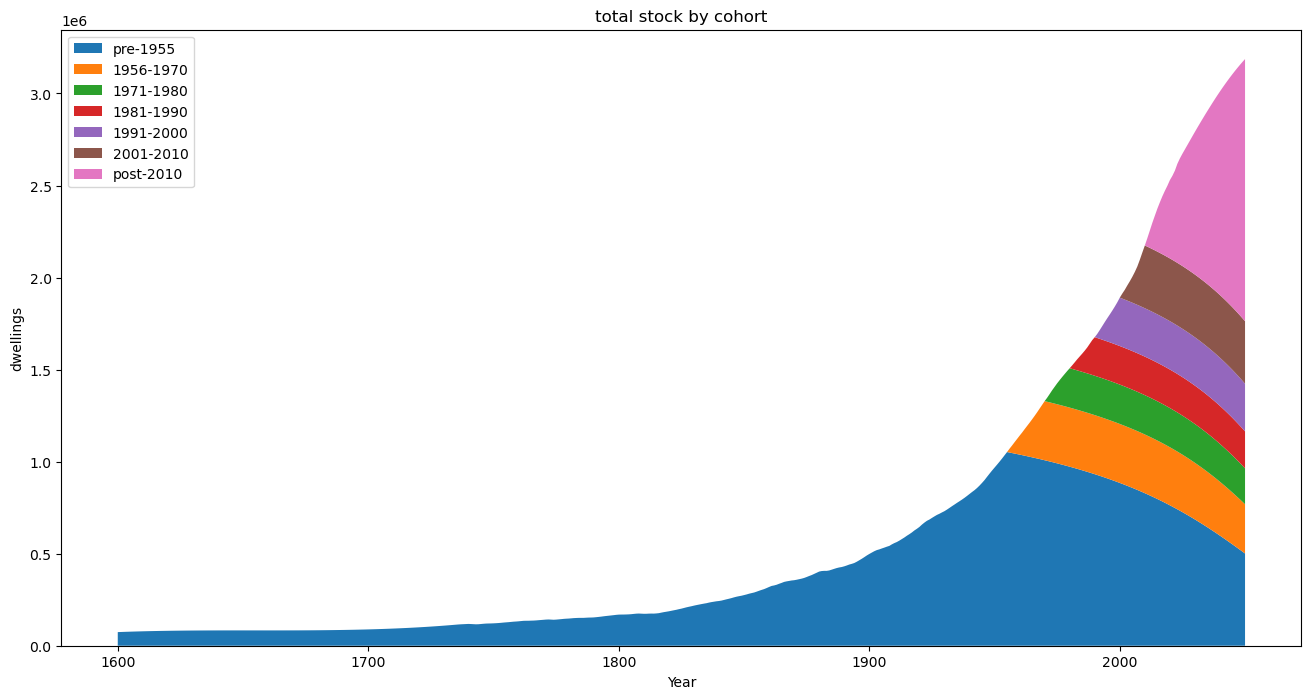

In [35]:
# Plot AB stock by tabula cohort
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), total_stock_by_tabula_cohort.loc[:,'pre-1955'], 
    total_stock_by_tabula_cohort.loc[:,'1956-1970'],
    total_stock_by_tabula_cohort.loc[:,'1971-1980'],
    total_stock_by_tabula_cohort.loc[:,'1981-1990'],
    total_stock_by_tabula_cohort.loc[:,'1991-2000'],
    total_stock_by_tabula_cohort.loc[:,'2001-2010'],
    total_stock_by_tabula_cohort.loc[:,'post-2010'],
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('total stock by cohort')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.ylabel('dwellings')

Plot total inflow by type

Text(0, 0.5, 'dwellings')

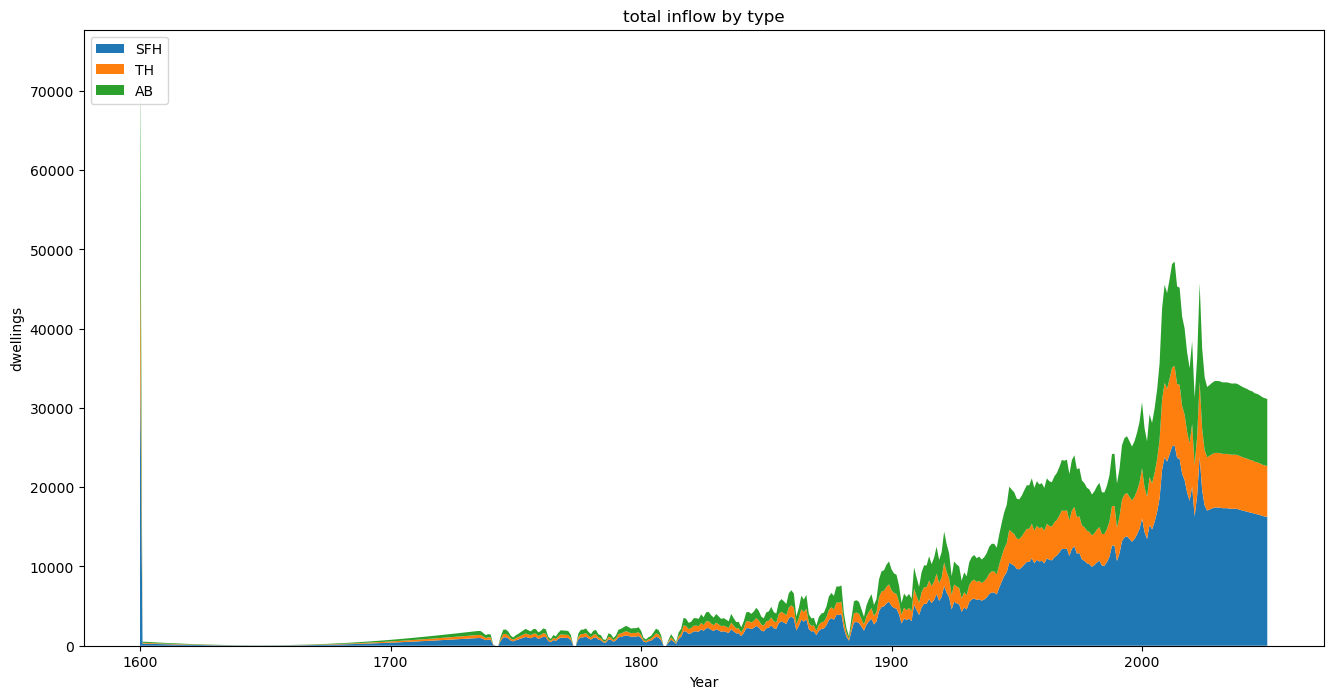

In [36]:
# Plot AB stock by tabula cohort
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), i_SFH, 
    i_TH,
    i_AB,
    labels=[
        'SFH', 'TH', 'AB']
    )

plt.title('total inflow by type')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.ylabel('dwellings')

Plot total outflow

Text(0, 0.5, 'dwellings')

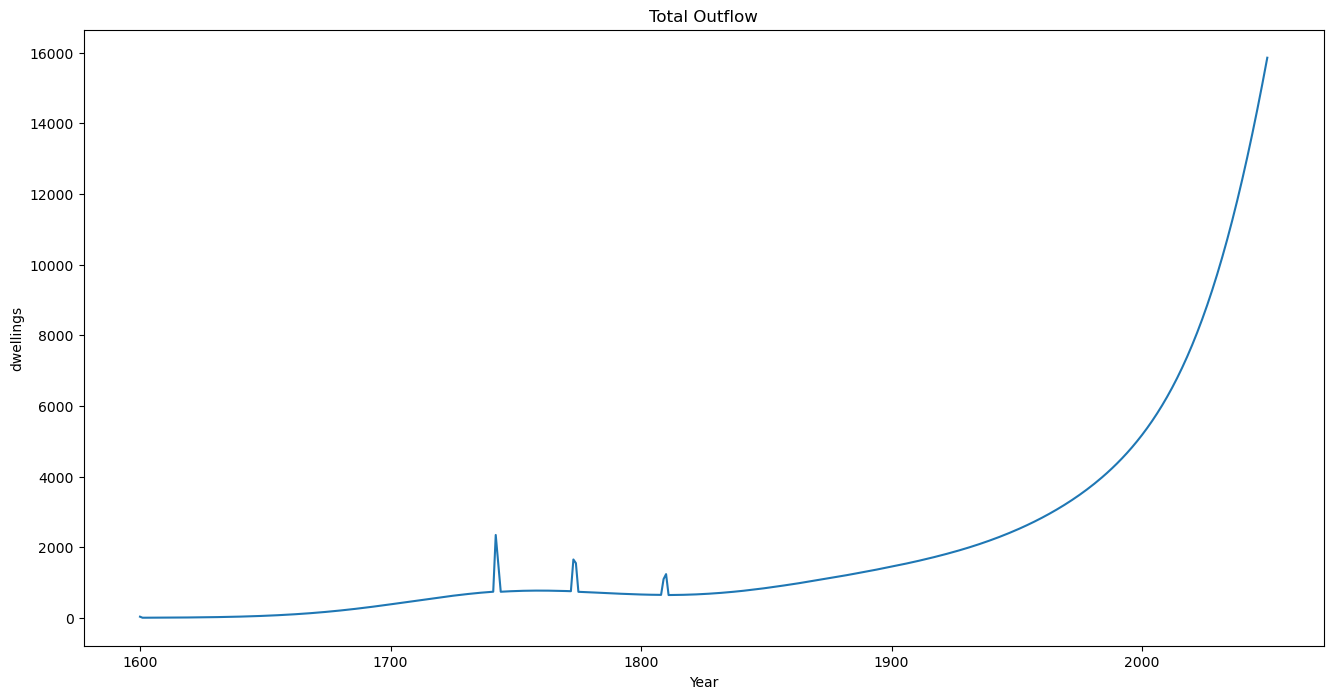

In [37]:
# Plot total outlfow
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), o_total.sum(axis=1))
plt.title('Total Outflow')
plt.xlabel('Year')
plt.ylabel('dwellings')

Plot total inflow

Text(0, 0.5, 'dwellings')

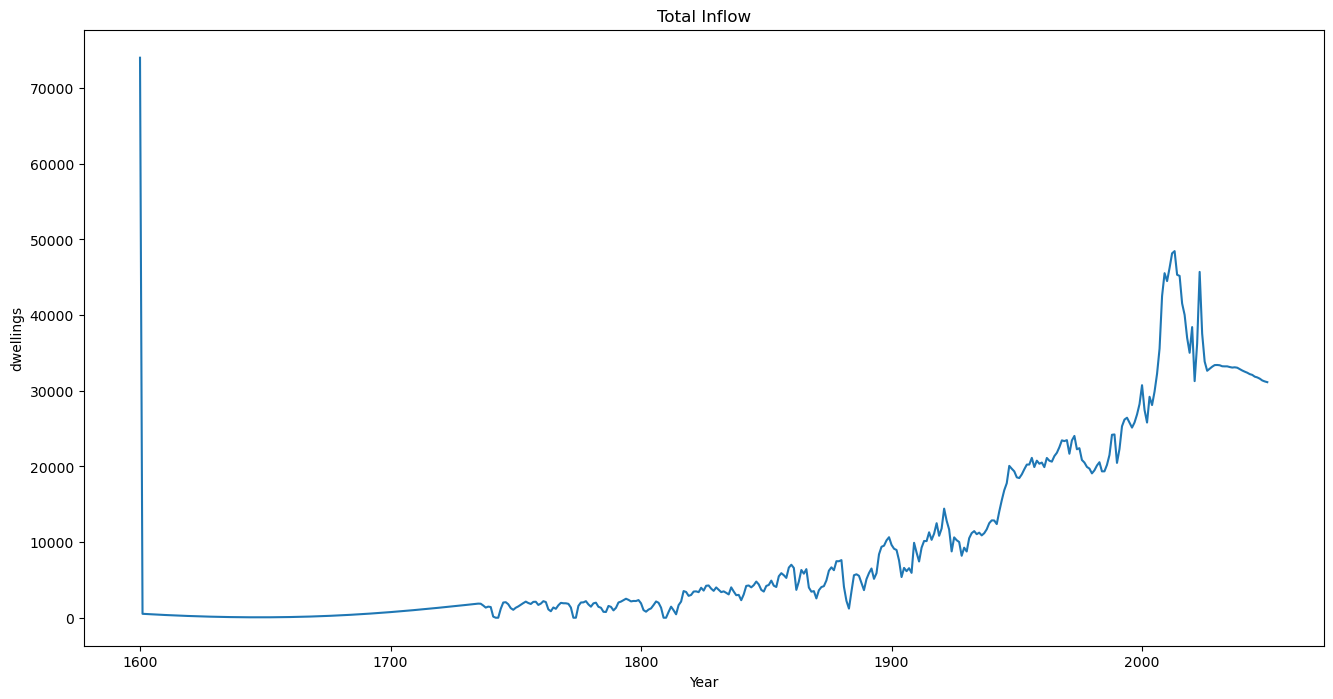

In [38]:
# Plot total inflow
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), i_total)
plt.title('Total Inflow')
plt.xlabel('Year')
plt.ylabel('dwellings')

Convert number of dwellings into floor area by DSM cohort

In [39]:
s_c_SFH_df

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Year,,,,,,,,,,,,,,,,,,,,,
1600,3.863628e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1601,3.863489e+04,2.701459e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1602,3.863340e+04,2.701362e+02,2.602378e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1603,3.863180e+04,2.701257e+02,2.602285e+02,2.505252e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1604,3.863007e+04,2.701145e+02,2.602184e+02,2.505162e+02,2.410085e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1.075963e-06,8.725643e-09,9.744455e-09,1.086970e-08,1.211069e-08,1.347727e-08,1.497984e-08,1.662932e-08,1.843717e-08,2.041532e-08,...,16982.903955,16911.446381,16814.008844,16761.131187,16638.903848,16586.994139,0.000000,0.000000,0.000000,0.000000
2047,9.272368e-07,7.523149e-09,8.405600e-09,9.380755e-09,1.045678e-08,1.164232e-08,1.294654e-08,1.437904e-08,1.594992e-08,1.766969e-08,...,16982.897547,16911.441373,16814.004947,16761.128155,16638.901505,16586.992325,16501.092734,0.000000,0.000000,0.000000
2048,7.986839e-07,6.483252e-09,7.247212e-09,8.091871e-09,9.024392e-09,1.005237e-08,1.118385e-08,1.242729e-08,1.379158e-08,1.528598e-08,...,16982.889402,16911.434991,16813.999967,16761.124270,16638.898494,16586.989989,16501.090930,16376.822361,0.000000,0.000000


In [70]:
print(np.diag(UFApD['UFApD SFH']))

[[330.68280585   0.           0.         ...   0.           0.
    0.        ]
 [  0.         330.34269932   0.         ...   0.           0.
    0.        ]
 [  0.           0.         330.00259279 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... 178.31508046   0.
    0.        ]
 [  0.           0.           0.         ...   0.         177.97497393
    0.        ]
 [  0.           0.           0.         ...   0.           0.
  177.6348674 ]]


In [40]:
s_UFA_c_SFH = s_c_SFH_df @ np.diag(UFApD['UFApD SFH'])
s_UFA_c_SFH = pd.DataFrame(s_UFA_c_SFH)
s_UFA_c_SFH.columns = np.arange(1600, 2051)

s_UFA_c_TH = s_c_TH_df @ np.diag(UFApD['UFApD TH'])
s_UFA_c_TH = pd.DataFrame(s_UFA_c_TH)
s_UFA_c_TH.columns = np.arange(1600, 2051)

s_UFA_c_AB = s_c_AB_df @ np.diag(UFApD['UFApD AB'])
s_UFA_c_AB = pd.DataFrame(s_UFA_c_AB)
s_UFA_c_AB.columns = np.arange(1600, 2051)

i_SFH_UFA = i_SFH_df.mul(UFApD['UFApD SFH'].values, axis=0)
i_SFH_UFA = pd.DataFrame(i_SFH_UFA)


o_SFH_UFA = o_SFH_df @ np.diag(UFApD['UFApD SFH'])
o_SFH_UFA = pd.DataFrame(o_SFH_UFA)
o_SFH_UFA.columns = np.arange(1600, 2051)

i_TH_UFA = i_TH_df.mul(UFApD['UFApD TH'].values, axis=0)
i_TH_UFA = pd.DataFrame(i_TH_UFA)


o_TH_UFA = o_TH_df @ np.diag(UFApD['UFApD TH'])
o_TH_UFA = pd.DataFrame(o_TH_UFA)
o_TH_UFA.columns = np.arange(1600, 2051)

i_AB_UFA = i_AB_df.mul(UFApD['UFApD AB'].values, axis=0)
i_AB_UFA = pd.DataFrame(i_AB_UFA)

o_AB_UFA = o_AB_df @ np.diag(UFApD['UFApD AB'])
o_AB_UFA = pd.DataFrame(o_AB_UFA)
o_AB_UFA.columns = np.arange(1600, 2051)



In [71]:
s_UFA_c_SFH

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Year,,,,,,,,,,,,,,,,,,,,,
1600,1.277635e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1601,1.277589e+07,89240.710223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1602,1.277540e+07,89237.509651,85879.145748,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1603,1.277487e+07,89234.065612,85876.065737,82588.754944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1604,1.277430e+07,89230.361406,85872.751430,82585.792941,79369.491045,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,3.558025e-04,0.000003,0.000003,0.000004,0.000004,0.000004,0.000005,0.000005,0.000006,0.000007,...,3.068740e+06,3.050076e+06,3.026784e+06,3.011565e+06,2.983944e+06,2.968994e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2047,3.066213e-04,0.000002,0.000003,0.000003,0.000003,0.000004,0.000004,0.000005,0.000005,0.000006,...,3.068739e+06,3.050075e+06,3.026783e+06,3.011564e+06,2.983944e+06,2.968994e+06,2.948006e+06,0.000000e+00,0.000000e+00,0.000000e+00
2048,2.641110e-04,0.000002,0.000002,0.000003,0.000003,0.000003,0.000004,0.000004,0.000005,0.000005,...,3.068737e+06,3.050074e+06,3.026783e+06,3.011563e+06,2.983944e+06,2.968993e+06,2.948005e+06,2.920234e+06,0.000000e+00,0.000000e+00


# PLOT STOCK, INFLOW, OUTFLOW OF FLOOR AREA

total SFH stock (UFA)

Text(0, 0.5, 'UFA')

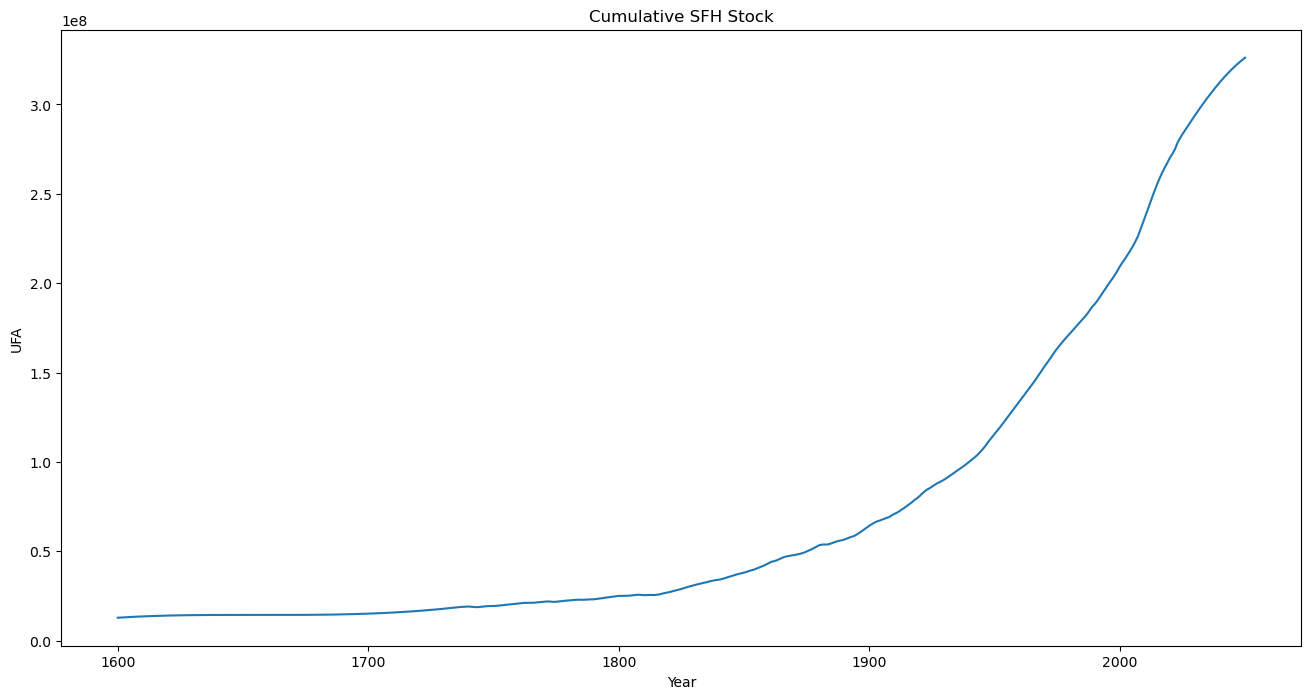

In [41]:
# Plot SFH total stock
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_UFA_c_SFH.sum(axis=1))
plt.title('Cumulative SFH Stock')
plt.xlabel('Year')
plt.ylabel('UFA')

total TH stock (UFA)

Text(0, 0.5, 'UFA')

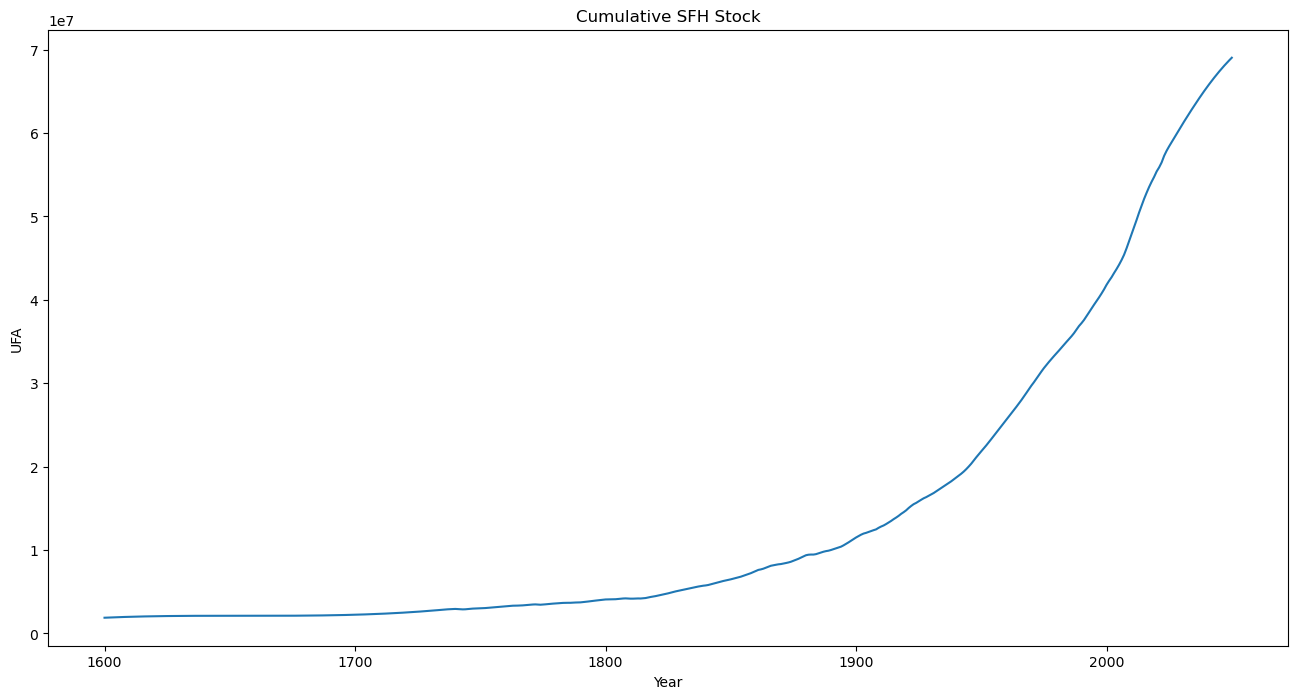

In [42]:
# Plot SFH total stock
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_UFA_c_TH.sum(axis=1))
plt.title('Cumulative SFH Stock')
plt.xlabel('Year')
plt.ylabel('UFA')

total AB stock (UFA)

Text(0, 0.5, 'UFA')

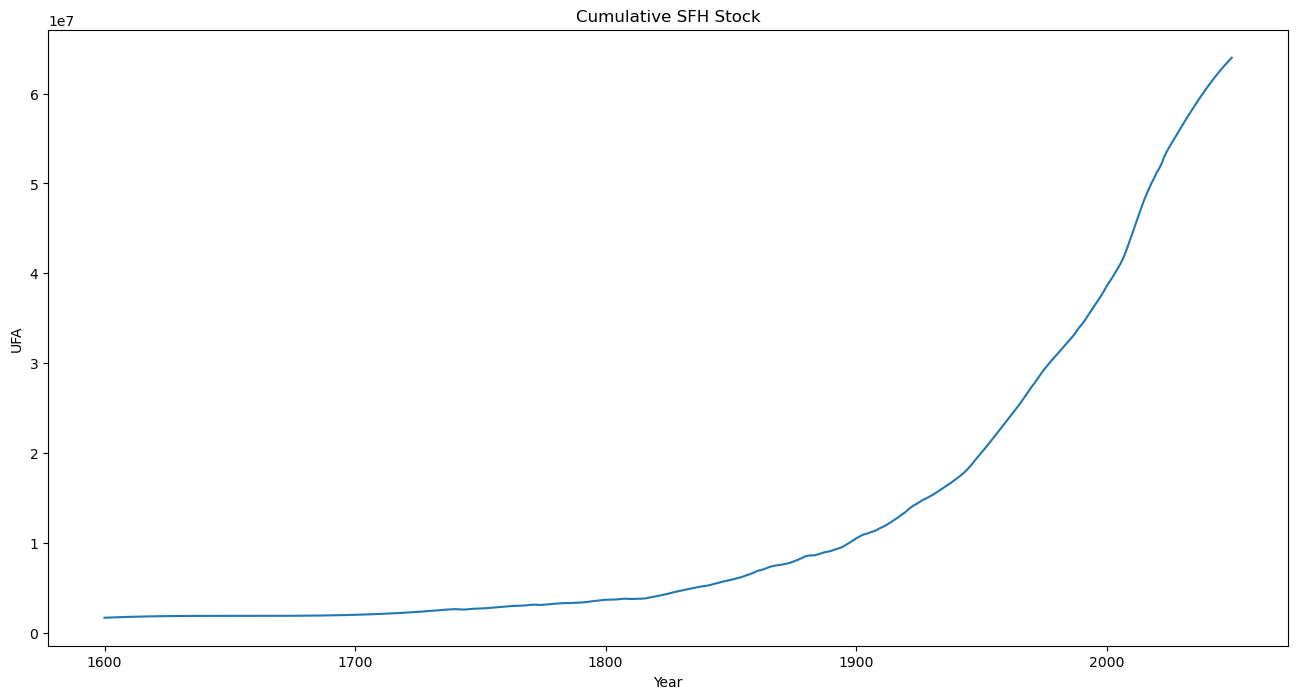

In [43]:
# Plot SFH total stock
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_UFA_c_AB.sum(axis=1))
plt.title('Cumulative SFH Stock')
plt.xlabel('Year')
plt.ylabel('UFA')

Make s_c_UFA arrays into dataframes for easier use

In [44]:
UFApD.drop_duplicates(inplace=True)

s_UFA_c_SFH_df = pd.DataFrame(s_UFA_c_SFH)
s_UFA_c_SFH_df = s_UFA_c_SFH_df.set_index(UFApD.index)
s_UFA_c_SFH_df.columns = np.arange(1600, 2051)
s_UFA_c_SFH_df

s_UFA_c_TH_df = pd.DataFrame(s_UFA_c_TH)
s_UFA_c_TH_df = s_UFA_c_TH_df.set_index(UFApD.index)
s_UFA_c_TH_df.columns = np.arange(1600, 2051)
s_UFA_c_TH_df

s_UFA_c_AB_df = pd.DataFrame(s_UFA_c_AB)
s_UFA_c_AB_df = s_UFA_c_AB_df.set_index(UFApD.index)
s_UFA_c_AB_df.columns = np.arange(1600, 2051)
s_UFA_c_AB_df

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Year,,,,,,,,,,,,,,,,,,,,,
1600,1.677009e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1601,1.676949e+06,1.172231e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1602,1.676884e+06,1.172189e+04,1.128912e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1603,1.676815e+06,1.172144e+04,1.128871e+04,1.086465e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1604,1.676740e+06,1.172095e+04,1.128828e+04,1.086426e+04,1.044892e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,4.670222e-05,3.786277e-07,4.227145e-07,4.713918e-07,5.250587e-07,5.841379e-07,6.490753e-07,7.203393e-07,7.984199e-07,8.838277e-07,...,643391.530912,640472.689775,636572.046002,634360.304172,629526.069513,627354.453218,0.000000,0.000000,0.000000,0.000000
2047,4.024675e-05,3.264484e-07,3.646350e-07,4.068198e-07,4.533533e-07,5.046069e-07,5.609726e-07,6.228629e-07,6.907096e-07,7.649631e-07,...,643391.288123,640472.500107,636571.898457,634360.189399,629525.980842,627354.384607,623898.925746,0.000000,0.000000,0.000000
2048,3.466691e-05,2.813247e-07,3.143841e-07,3.509241e-07,3.912522e-07,4.356945e-07,4.845956e-07,5.383182e-07,5.972428e-07,6.617663e-07,...,643390.979567,640472.258419,636571.709944,634360.042367,629525.866944,627354.296241,623898.857513,618995.315646,0.000000,0.000000


Aggregate s_c dataframes into the cohorts from tabula for each type for plotting

In [45]:
SFH_UFA_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_UFA_c_SFH_df).loc[:,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_UFA_c_SFH_df).loc[:,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_UFA_c_SFH_df).loc[:,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_UFA_c_SFH_df).loc[:,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_UFA_c_SFH_df).loc[:,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_UFA_c_SFH_df).loc[:,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_UFA_c_SFH_df).loc[:,'2011':'2050'].sum(axis=1)}
          )

TH_UFA_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_UFA_c_TH_df).loc[:,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_UFA_c_TH_df).loc[:,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_UFA_c_TH_df).loc[:,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_UFA_c_TH_df).loc[:,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_UFA_c_TH_df).loc[:,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_UFA_c_TH_df).loc[:,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_UFA_c_TH_df).loc[:,'2011':'2050'].sum(axis=1)}
          )

AB_UFA_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_UFA_c_AB_df).loc[:,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_UFA_c_AB_df).loc[:,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_UFA_c_AB_df).loc[:,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_UFA_c_AB_df).loc[:,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_UFA_c_AB_df).loc[:,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_UFA_c_AB_df).loc[:,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_UFA_c_AB_df).loc[:,'2011':'2050'].sum(axis=1)}
          )

Make a stackplot of SFH UFA by tabula cohorts

Text(0, 0.5, 'UFA')

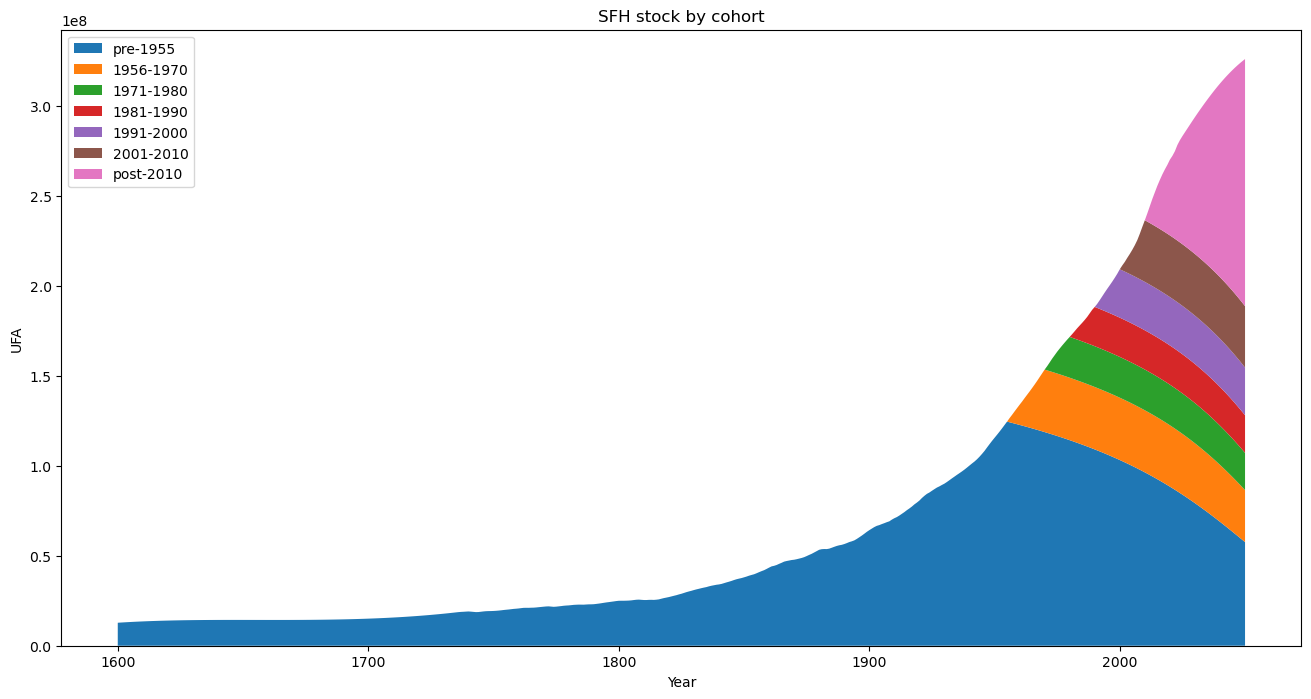

In [46]:
# Plot SFH stock by tabula cohort
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), SFH_UFA_stock_by_tabula_cohort.loc[:,'pre-1955'], 
    SFH_UFA_stock_by_tabula_cohort.loc[:,'1956-1970'],
    SFH_UFA_stock_by_tabula_cohort.loc[:,'1971-1980'],
    SFH_UFA_stock_by_tabula_cohort.loc[:,'1981-1990'],
    SFH_UFA_stock_by_tabula_cohort.loc[:,'1991-2000'],
    SFH_UFA_stock_by_tabula_cohort.loc[:,'2001-2010'],
    SFH_UFA_stock_by_tabula_cohort.loc[:,'post-2010'],
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('SFH stock by cohort')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.ylabel('UFA')

Make a stackplot of TH UFA by tabula cohorts

Text(0, 0.5, 'UFA')

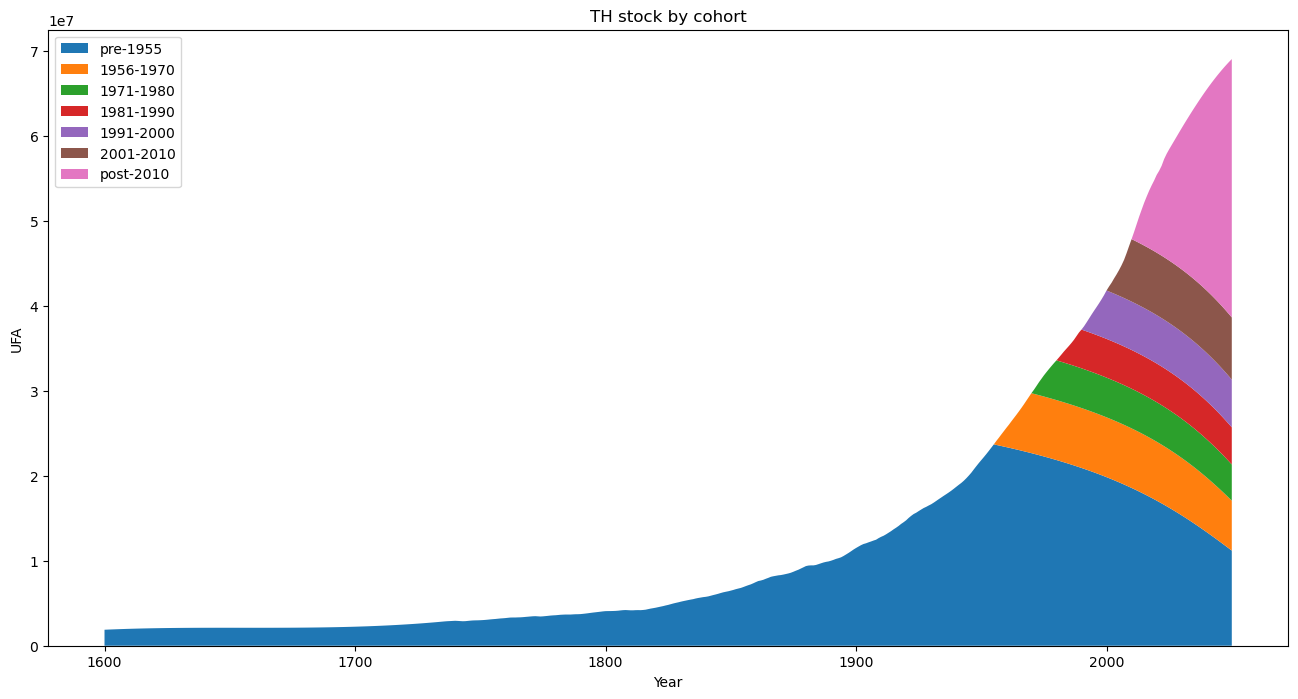

In [47]:
# Plot TH stock by tabula cohort
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), TH_UFA_stock_by_tabula_cohort.loc[:,'pre-1955'], 
    TH_UFA_stock_by_tabula_cohort.loc[:,'1956-1970'],
    TH_UFA_stock_by_tabula_cohort.loc[:,'1971-1980'],
    TH_UFA_stock_by_tabula_cohort.loc[:,'1981-1990'],
    TH_UFA_stock_by_tabula_cohort.loc[:,'1991-2000'],
    TH_UFA_stock_by_tabula_cohort.loc[:,'2001-2010'],
    TH_UFA_stock_by_tabula_cohort.loc[:,'post-2010'],
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('TH stock by cohort')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.ylabel('UFA')

Make a stackplot of AB UFA by tabula cohorts

Text(0, 0.5, 'dwellings')

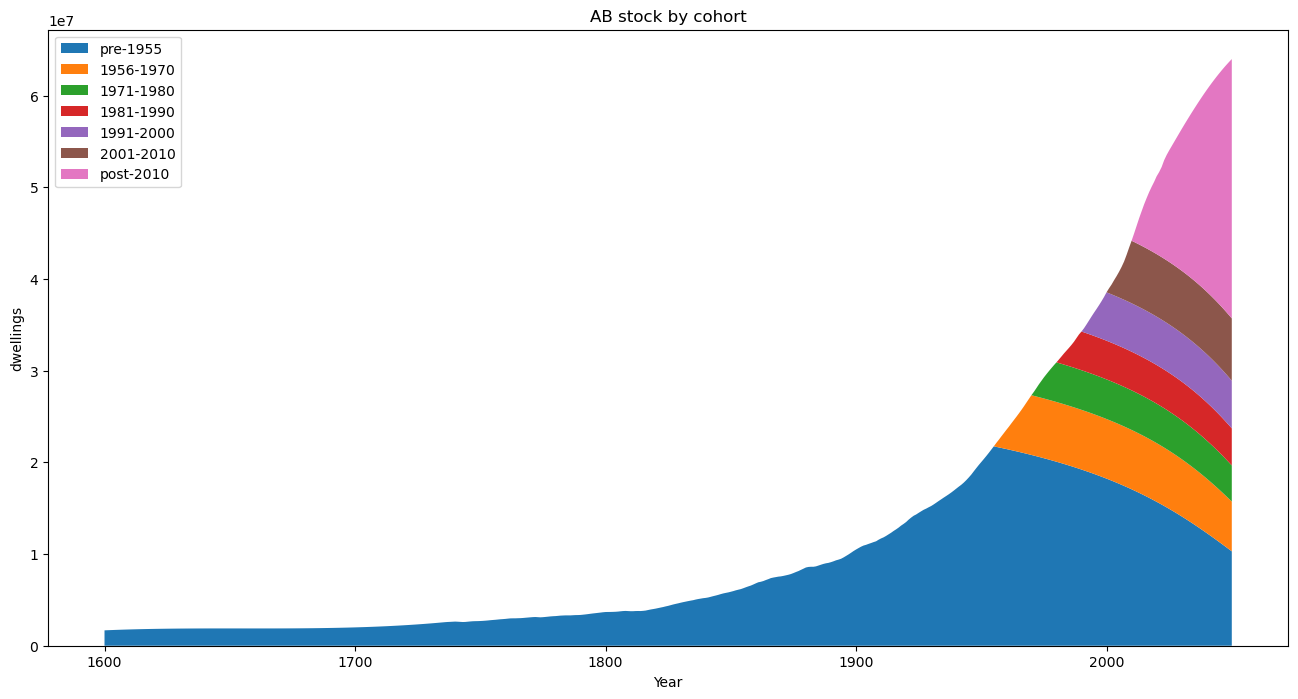

In [48]:
# Plot AB stock by tabula cohort
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), AB_UFA_stock_by_tabula_cohort.loc[:,'pre-1955'], 
    AB_UFA_stock_by_tabula_cohort.loc[:,'1956-1970'],
    AB_UFA_stock_by_tabula_cohort.loc[:,'1971-1980'],
    AB_UFA_stock_by_tabula_cohort.loc[:,'1981-1990'],
    AB_UFA_stock_by_tabula_cohort.loc[:,'1991-2000'],
    AB_UFA_stock_by_tabula_cohort.loc[:,'2001-2010'],
    AB_UFA_stock_by_tabula_cohort.loc[:,'post-2010'],
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('AB stock by cohort')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.ylabel('dwellings')

Calculate total stock (s_total), total stock by cohort (s_c_total)

Calculate stock_changes by inflow - outflow for each type and aggregated

Calculate total inflows and outflows

In [49]:
s_UFA_total = s_UFA_c_SFH.sum(axis=1) + s_UFA_c_TH.sum(axis=1) + s_UFA_c_AB.sum(axis=1)

total_stock_UFA_by_tabula_cohort = SFH_UFA_stock_by_tabula_cohort + TH_UFA_stock_by_tabula_cohort + AB_UFA_stock_by_tabula_cohort

stock_change_SFH_UFA = i_SFH_UFA - pd.DataFrame(o_SFH_UFA.sum(axis=1))
stock_change_TH_UFA = i_TH_UFA - pd.DataFrame(o_TH_UFA.sum(axis=1))
stock_change_AB_UFA = i_AB_UFA - pd.DataFrame(o_AB_UFA.sum(axis=1))

stock_change_total_UFA = stock_change_SFH_UFA + stock_change_TH_UFA + stock_change_AB_UFA

i_total_UFA = i_SFH_UFA + i_TH_UFA + i_AB_UFA

o_total_UFA = o_SFH_UFA + o_TH_UFA + o_AB_UFA

Plot stock change UFA

Text(0, 0.5, 'dwellings')

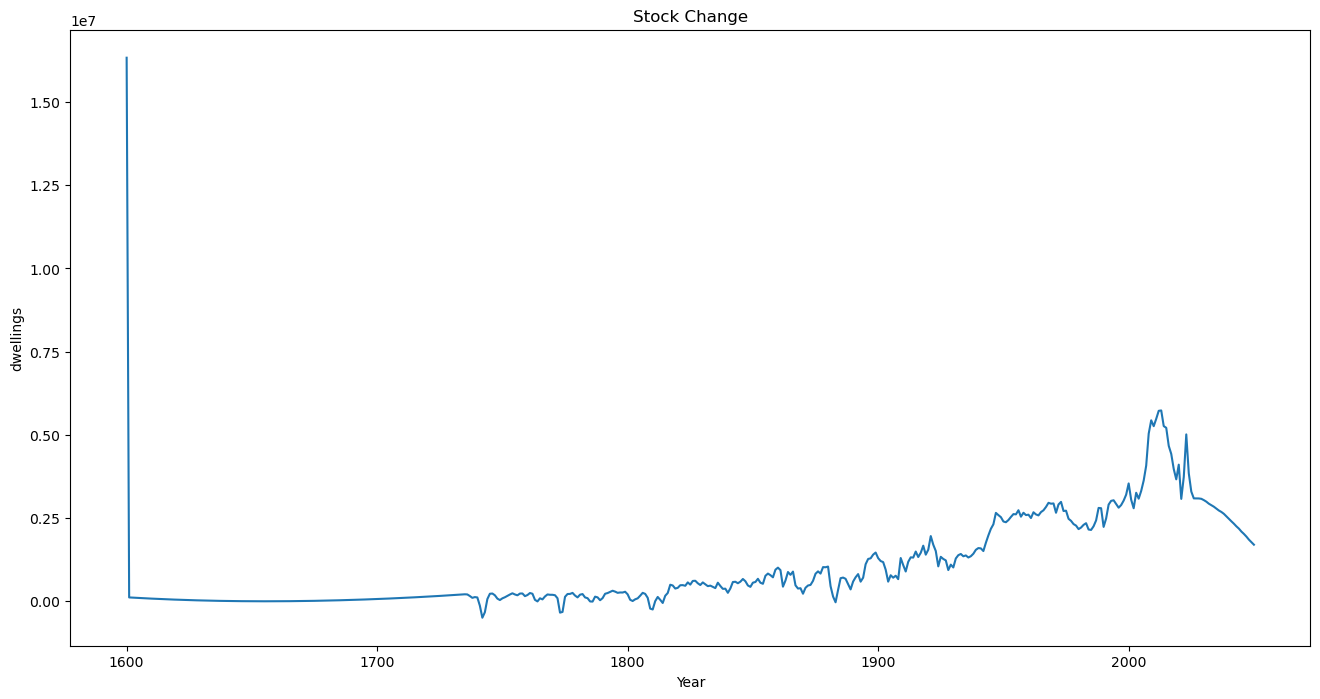

In [50]:
# Plot total stock change
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), stock_change_total_UFA)
plt.title('Stock Change')
plt.xlabel('Year')
plt.ylabel('dwellings')

Plot tota stock UFA by type

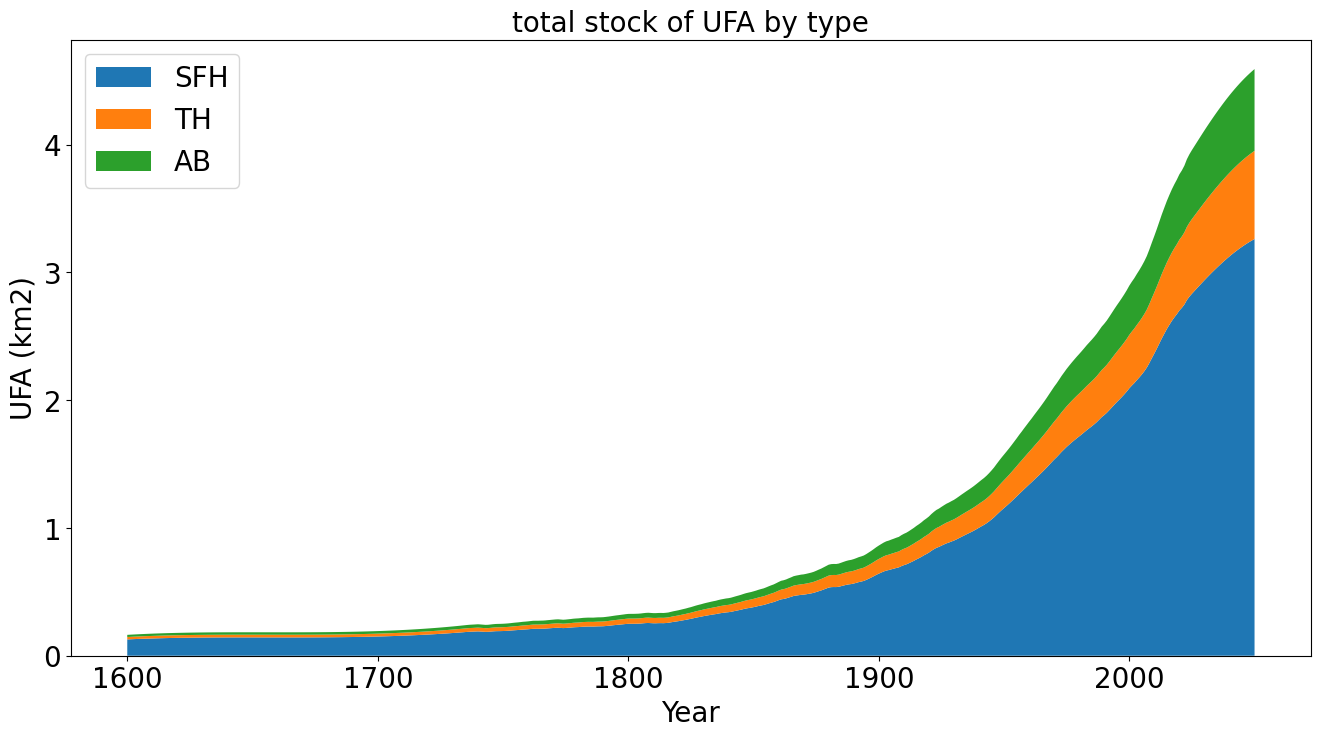

In [51]:
# Plot TH stock by tabula cohort
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), 
    s_UFA_c_SFH.sum(axis=1)/100000000, s_UFA_c_TH.sum(axis=1)/100000000, s_UFA_c_AB.sum(axis=1)/100000000,
    labels=['SFH', 'TH', 'AB']
    )




plt.title('total stock of UFA by type', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('UFA (km2)', fontsize=20)




plt.savefig(
    directory_path / 'visualizations/UFA_by_type.jpeg', 
    bbox_inches='tight')

Plot total stock UFA by cohort

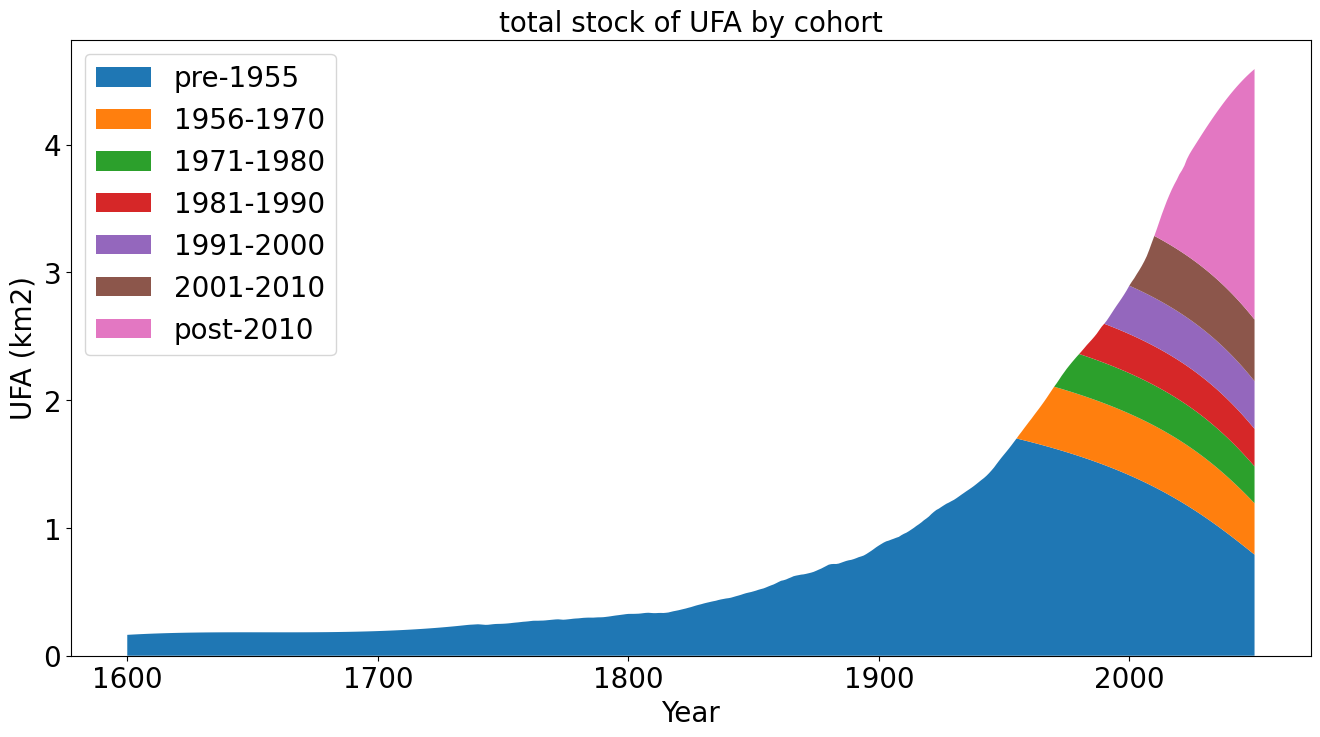

In [52]:
# Plot AB stock by tabula cohort
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), total_stock_UFA_by_tabula_cohort.loc[:,'pre-1955']/100000000, 
    total_stock_UFA_by_tabula_cohort.loc[:,'1956-1970']/100000000,
    total_stock_UFA_by_tabula_cohort.loc[:,'1971-1980']/100000000,
    total_stock_UFA_by_tabula_cohort.loc[:,'1981-1990']/100000000,
    total_stock_UFA_by_tabula_cohort.loc[:,'1991-2000']/100000000,
    total_stock_UFA_by_tabula_cohort.loc[:,'2001-2010']/100000000,
    total_stock_UFA_by_tabula_cohort.loc[:,'post-2010']/100000000,
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('total stock of UFA by cohort', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('UFA (km2)', fontsize=20)




plt.savefig(
    directory_path / 'visualizations/UFA_by_cohort.jpeg', 
    bbox_inches='tight')

Plot total inflow UFA by type

Text(0, 0.5, 'UFA')

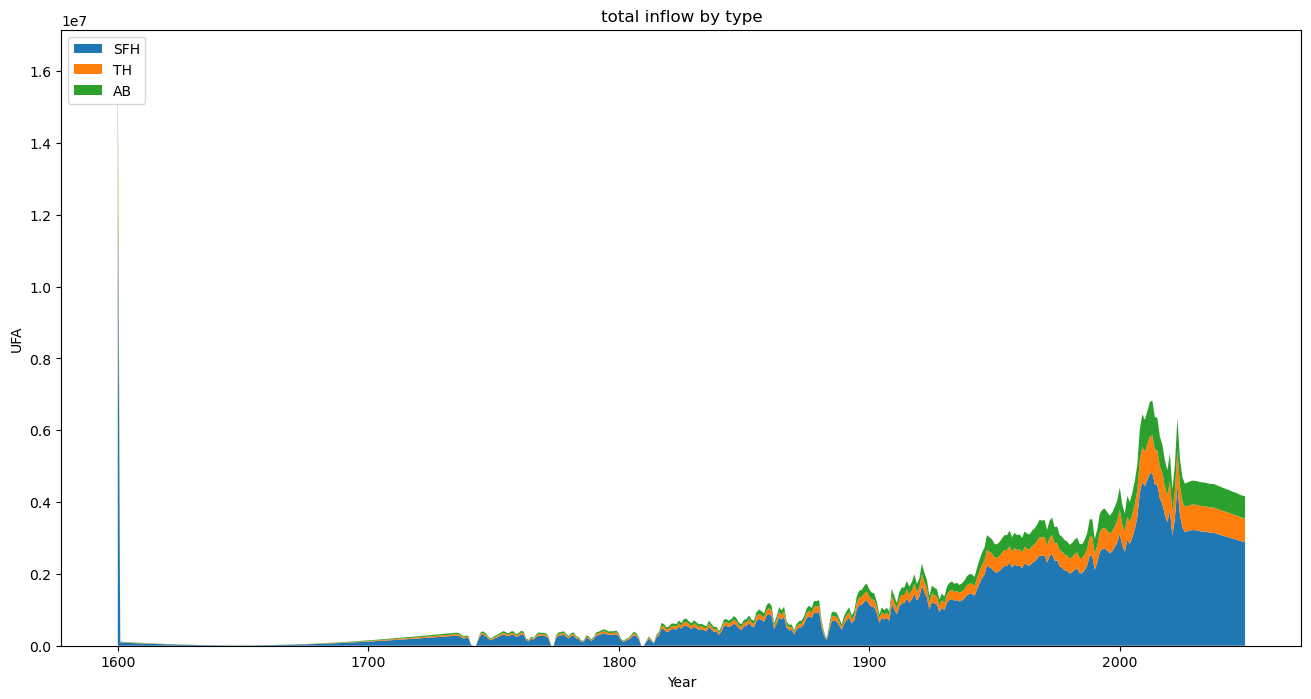

In [53]:
# Plot AB stock by tabula cohort
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), i_SFH_UFA.T, 
    i_TH_UFA.T,
    i_AB_UFA.T,
    labels=[
        'SFH', 'TH', 'AB']
    )

plt.title('total inflow by type')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.ylabel('UFA')

Plot total outflow UFA

Text(0, 0.5, 'dwellings')

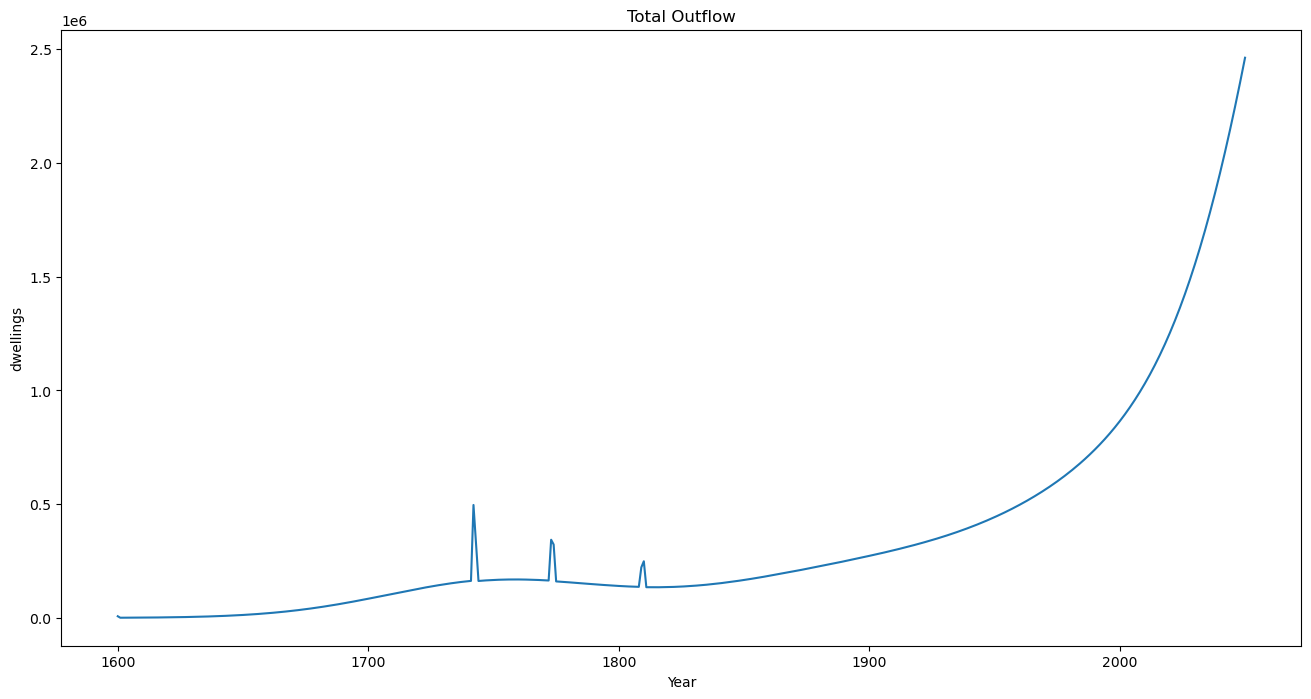

In [54]:
# Plot total outlfow
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), o_total_UFA.sum(axis=1))
plt.title('Total Outflow')
plt.xlabel('Year')
plt.ylabel('dwellings')

plot total inflow UFA

Text(0, 0.5, 'dwellings')

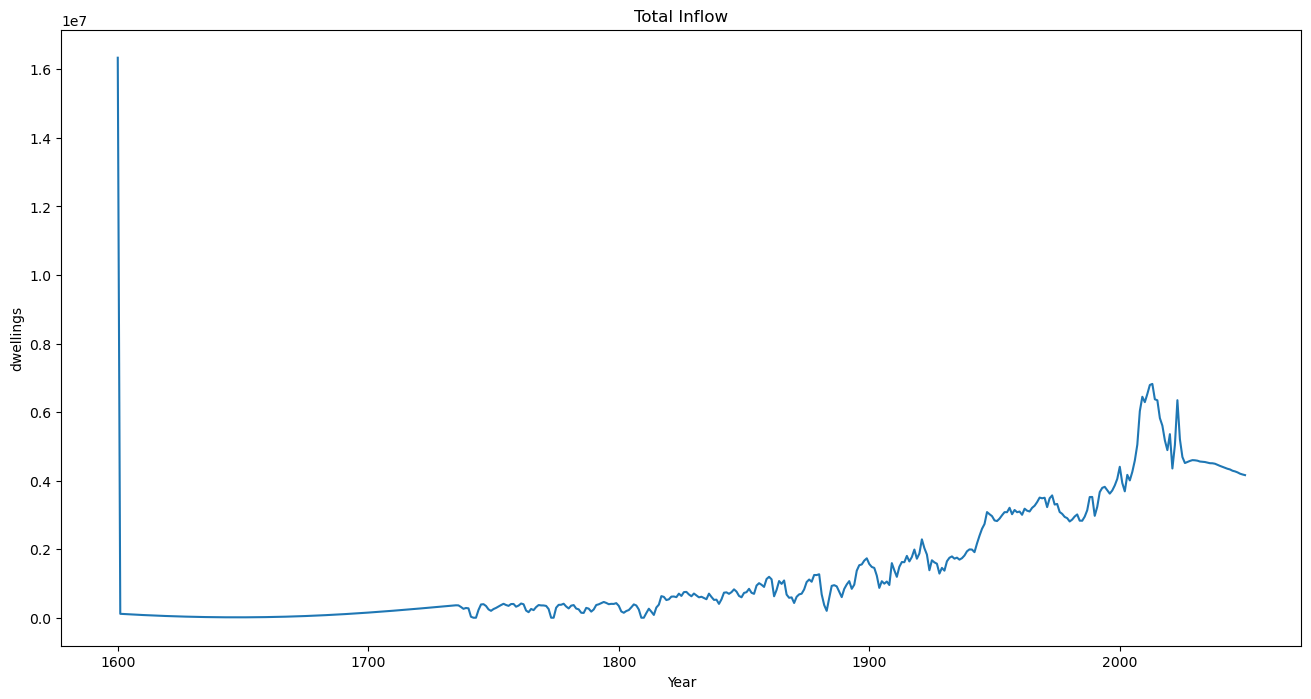

In [55]:
# Plot total inflow
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), i_total_UFA)
plt.title('Total Inflow')
plt.xlabel('Year')
plt.ylabel('dwellings')

Define a function that calculates energy use for SFH, original renovation level

In [56]:
def energy_use_calculation_SFH(stock_c_UFA):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_SFH.loc[:, year],energy_intensity.loc[('pre 1955' , 'SFH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1956 and int(year) <= 1970:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_SFH.loc[:, year],energy_intensity.loc[('1956-70' , 'SFH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1971 and int(year) <= 1980:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_SFH.loc[:, year],energy_intensity.loc[('1971-80' , 'SFH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1981 and int(year) <= 1990:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_SFH.loc[:, year],energy_intensity.loc[('1981-90' , 'SFH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1991 and int(year) <= 2000:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_SFH.loc[:, year],energy_intensity.loc[('1991-2000' , 'SFH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2001 and int(year) <= 2010:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_SFH.loc[:, year],energy_intensity.loc[('2001-2010' , 'SFH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2011:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_SFH.loc[:, year],energy_intensity.loc[('2011-' , 'SFH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
    return energy_use_matrix

Run function that spits out energy use of SFH by DSM cohort

In [57]:
energy_use_matrix_SFH = energy_use_calculation_SFH(s_UFA_c_SFH)
energy_use_matrix_SFH

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Year,,,,,,,,,,,,,,,,,,,,,
1600,2.913008e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1601,2.912904e+09,2.034688e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1602,2.912792e+09,2.034615e+07,1.958045e+07,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1603,2.912671e+09,2.034537e+07,1.957974e+07,1.883024e+07,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1604,2.912541e+09,2.034452e+07,1.957899e+07,1.882956e+07,1.809624e+07,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,8.112297e-02,6.571992e-04,7.331786e-04,8.170001e-04,9.093374e-04,0.001011,0.001122,0.001245,0.001379,0.001525,...,2.577741e+08,2.562064e+08,2.542499e+08,2.529714e+08,2.506513e+08,2.493955e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2047,6.990965e-02,5.666295e-04,6.324423e-04,7.050861e-04,7.851524e-04,0.000873,0.000970,0.001076,0.001193,0.001320,...,2.577741e+08,2.562063e+08,2.542498e+08,2.529714e+08,2.506513e+08,2.493955e+08,2.476325e+08,0.000000e+00,0.000000e+00,0.000000e+00
2048,6.021731e-02,4.883065e-04,5.452845e-04,6.082097e-04,6.776010e-04,0.000754,0.000838,0.000930,0.001031,0.001142,...,2.577739e+08,2.562062e+08,2.542497e+08,2.529713e+08,2.506513e+08,2.493954e+08,2.476325e+08,2.452997e+08,0.000000e+00,0.000000e+00


calculate vector of energy use for SFH (not by cohort)

In [58]:
energy_use_vector_SFH = energy_use_matrix_SFH.sum(axis=1)
energy_use_vector_SFH

Year
1600    2.913008e+09
1601    2.933251e+09
1602    2.952718e+09
1603    2.971426e+09
1604    2.989390e+09
            ...     
2046    4.817111e+10
2047    4.804136e+10
2048    4.790117e+10
2049    4.775131e+10
2050    4.759196e+10
Length: 451, dtype: float64

Define a function that calculates energy use for TH, original renovation level

In [59]:
def energy_use_calculation_TH(stock_c_UFA):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_TH.loc[:, year],energy_intensity.loc[('pre 1955' , 'TH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1956 and int(year) <= 1970:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_TH.loc[:, year],energy_intensity.loc[('1956-70' , 'TH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1971 and int(year) <= 1980:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_TH.loc[:, year],energy_intensity.loc[('1971-80' , 'TH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1981 and int(year) <= 1990:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_TH.loc[:, year],energy_intensity.loc[('1981-90' , 'TH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1991 and int(year) <= 2000:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_TH.loc[:, year],energy_intensity.loc[('1991-2000' , 'TH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2001 and int(year) <= 2010:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_TH.loc[:, year],energy_intensity.loc[('2001-2010' , 'TH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2011:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_TH.loc[:, year],energy_intensity.loc[('2011-' , 'TH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
    return energy_use_matrix

Run function that spits out energy use of TH by DSM cohort

In [60]:
energy_use_matrix_TH = energy_use_calculation_TH(s_UFA_c_TH)
energy_use_matrix_TH

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Year,,,,,,,,,,,,,,,,,,,,,
1600,5.751481e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1601,5.751275e+08,4.019953e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1602,5.751053e+08,4.019809e+06,3.871072e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1603,5.750814e+08,4.019654e+06,3.870933e+06,3.725208e+06,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1604,5.750557e+08,4.019487e+06,3.870784e+06,3.725074e+06,3.582363e+06,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1.601702e-02,1.298435e-04,1.449501e-04,1.616281e-04,1.800139e-04,0.000200,0.000222,0.000247,0.000274,0.000303,...,6.007661e+07,5.979718e+07,5.942616e+07,5.921286e+07,5.875485e+07,5.854541e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2047,1.380305e-02,1.119496e-04,1.250344e-04,1.394880e-04,1.554301e-04,0.000173,0.000192,0.000213,0.000237,0.000262,...,6.007659e+07,5.979717e+07,5.942615e+07,5.921285e+07,5.875484e+07,5.854540e+07,5.821621e+07,0.000000e+00,0.000000e+00,0.000000e+00
2048,1.188938e-02,9.647518e-05,1.078033e-04,1.203228e-04,1.341390e-04,0.000149,0.000166,0.000185,0.000205,0.000227,...,6.007656e+07,5.979714e+07,5.942613e+07,5.921284e+07,5.875483e+07,5.854539e+07,5.821620e+07,5.775198e+07,0.000000e+00,0.000000e+00


calculate vector of energy use for TH (not by cohort)

In [61]:
energy_use_vector_TH = energy_use_matrix_TH.sum(axis=1)
energy_use_vector_TH

Year
1600    5.751481e+08
1601    5.791474e+08
1602    5.829962e+08
1603    5.866972e+08
1604    5.902534e+08
            ...     
2046    1.073448e+10
2047    1.070462e+10
2048    1.067269e+10
2049    1.063886e+10
2050    1.060321e+10
Length: 451, dtype: float64

Define a function that calculates energy use for AB, original renovation level

In [62]:
def energy_use_calculation_AB(stock_c_UFA):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[:, year],energy_intensity.loc[('pre 1955' , 'AB', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1956 and int(year) <= 1970:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[:, year],energy_intensity.loc[('1956-70' , 'AB', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1971 and int(year) <= 1980:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[:, year],energy_intensity.loc[('1971-80' , 'AB', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1981 and int(year) <= 1990:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[:, year],energy_intensity.loc[('1981-90' , 'AB', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1991 and int(year) <= 2000:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[:, year],energy_intensity.loc[('1991-2000' , 'AB', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2001 and int(year) <= 2010:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[:, year],energy_intensity.loc[('2001-2010' , 'AB', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2011:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[:, year],energy_intensity.loc[('2011-' , 'AB', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
    return energy_use_matrix

Run function that spits out energy use of AB by DSM cohort

In [63]:
energy_use_matrix_AB = energy_use_calculation_AB(s_UFA_c_AB)
energy_use_matrix_AB

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Year,,,,,,,,,,,,,,,,,,,,,
1600,3.286938e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1601,3.286820e+08,2.297573e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1602,3.286693e+08,2.297490e+06,2.212667e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1603,3.286557e+08,2.297402e+06,2.212587e+06,2.129471e+06,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1604,3.286410e+08,2.297306e+06,2.212502e+06,2.129395e+06,2.047987e+06,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,9.153635e-03,7.421102e-05,8.285205e-05,9.239279e-05,1.029115e-04,0.000114,0.000127,0.000141,0.000156,0.000173,...,5.719751e+07,5.693802e+07,5.659125e+07,5.639463e+07,5.596487e+07,5.577181e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2047,7.888363e-03,6.398389e-05,7.146845e-05,7.973668e-05,8.885724e-05,0.000099,0.000110,0.000122,0.000135,0.000150,...,5.719749e+07,5.693801e+07,5.659124e+07,5.639462e+07,5.596486e+07,5.577180e+07,5.546461e+07,0.000000e+00,0.000000e+00,0.000000e+00
2048,6.794713e-03,5.513963e-05,6.161928e-05,6.878112e-05,7.668543e-05,0.000085,0.000095,0.000106,0.000117,0.000130,...,5.719746e+07,5.693798e+07,5.659123e+07,5.639461e+07,5.596485e+07,5.577180e+07,5.546461e+07,5.502868e+07,0.000000e+00,0.000000e+00


calculate vector of energy use for AB (not by cohort)

In [64]:
energy_use_vector_AB = energy_use_matrix_AB.sum(axis=1)
energy_use_vector_AB

Year
1600    3.286938e+08
1601    3.309796e+08
1602    3.331795e+08
1603    3.352951e+08
1604    3.373282e+08
            ...     
2046    8.157682e+09
2047    8.155903e+09
2048    8.152447e+09
2049    8.147491e+09
2050    8.141085e+09
Length: 451, dtype: float64

In [65]:
energy_use_matrix_total = energy_use_matrix_SFH + energy_use_matrix_TH + energy_use_matrix_AB

In [66]:
energy_use_vectors_concatenated = pd.concat([energy_use_vector_SFH, energy_use_vector_TH, energy_use_vector_AB], axis=1)
energy_use_vectors_concatenated = energy_use_vectors_concatenated.rename(columns={0: 'SFH', 1: 'TH', 2: 'AB'})

#energy_use_vectors_concatenated = pd.concat([energy_use_vectors_concatenat1, energy_use_vector_AB], axis=1)

energy_use_vectors_concatenated 

,SFH,TH,AB
Year,,,
1600,2.913008e+09,5.751481e+08,3.286938e+08
1601,2.933251e+09,5.791474e+08,3.309796e+08
1602,2.952718e+09,5.829962e+08,3.331795e+08
1603,2.971426e+09,5.866972e+08,3.352951e+08
1604,2.989390e+09,5.902534e+08,3.373282e+08
...,...,...,...
2046,4.817111e+10,1.073448e+10,8.157682e+09
2047,4.804136e+10,1.070462e+10,8.155903e+09
2048,4.790117e+10,1.067269e+10,8.152447e+09


Make two stack line charts for energy use by cohort and by type

Energy use by type

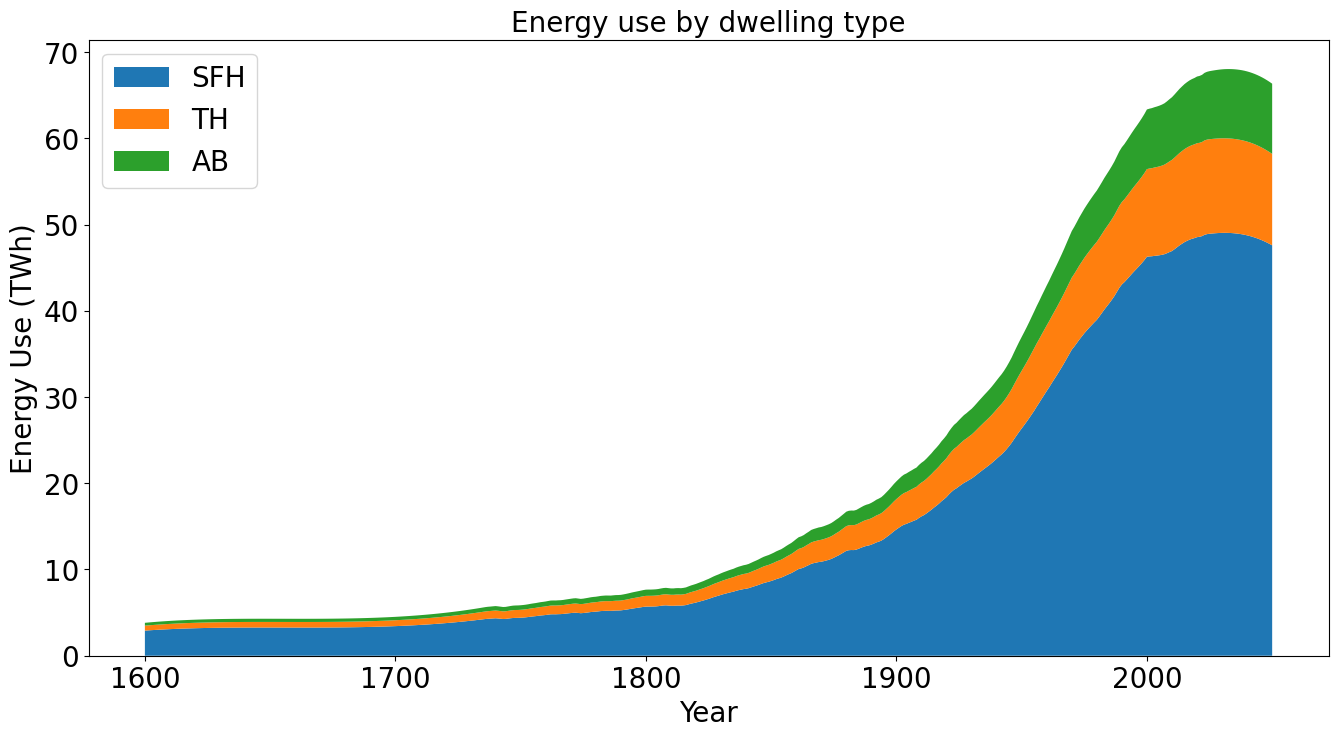

In [67]:
# 
plt.figure(figsize=(16, 8))

#1000000000

plt.stackplot(
    np.arange(1600, 2051), 
    energy_use_vector_SFH/1000000000, energy_use_vector_TH/1000000000, energy_use_vector_AB/1000000000,
    labels=['SFH', 'TH', 'AB']
    )

plt.title('Energy use by dwelling type', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.ylabel('Energy Use (TWh)', fontsize=20)

plt.savefig(
    directory_path / 'visualizations/energy_by_type.jpeg', 
    bbox_inches='tight')

Energy use by cohort

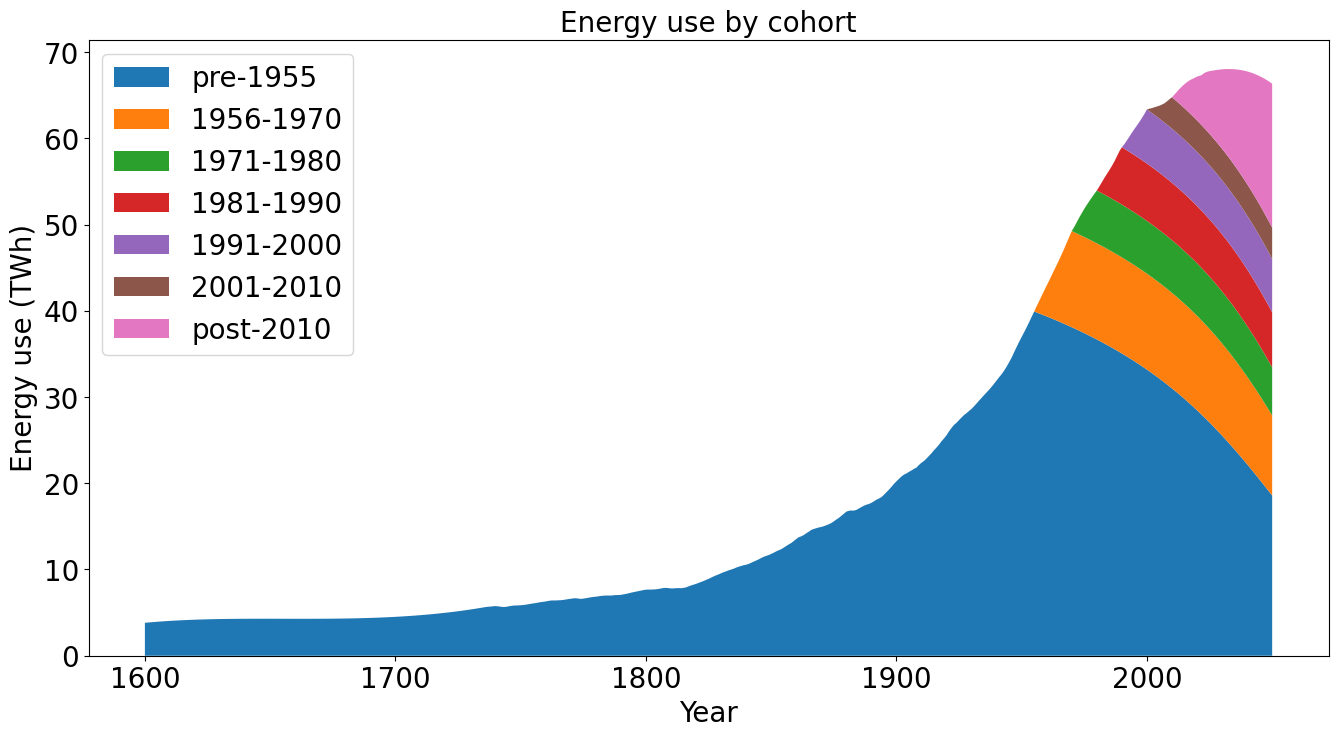

In [68]:
plt.figure(figsize=(16, 8))

energy_use_matrix_total_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(energy_use_matrix_total).loc[:,'1600':'1955'].sum(axis=1)/1000000000, 
          '1956-1970': pd.DataFrame(energy_use_matrix_total).loc[:,'1956':'1970'].sum(axis=1)/1000000000, 
          '1971-1980': pd.DataFrame(energy_use_matrix_total).loc[:,'1971':'1980'].sum(axis=1)/1000000000, 
          '1981-1990': pd.DataFrame(energy_use_matrix_total).loc[:,'1981':'1990'].sum(axis=1)/1000000000, 
          '1991-2000': pd.DataFrame(energy_use_matrix_total).loc[:,'1991':'2000'].sum(axis=1)/1000000000, 
          '2001-2010': pd.DataFrame(energy_use_matrix_total).loc[:,'2001':'2010'].sum(axis=1)/1000000000, 
          'post-2010': pd.DataFrame(energy_use_matrix_total).loc[:,'2011':'2050'].sum(axis=1)/1000000000}
          )

plt.stackplot(
    np.arange(1600, 2051), energy_use_matrix_total_tabula_cohort.loc[:,'pre-1955'], 
    energy_use_matrix_total_tabula_cohort.loc[:,'1956-1970'],
    energy_use_matrix_total_tabula_cohort.loc[:,'1971-1980'],
    energy_use_matrix_total_tabula_cohort.loc[:,'1981-1990'],
    energy_use_matrix_total_tabula_cohort.loc[:,'1991-2000'],
    energy_use_matrix_total_tabula_cohort.loc[:,'2001-2010'],
    energy_use_matrix_total_tabula_cohort.loc[:,'post-2010'],
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('Energy use by cohort', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.ylabel('Energy use (TWh)', fontsize=20)

plt.savefig(
    directory_path / 'visualizations/energy_by_cohort.jpeg', 
    bbox_inches='tight')

3D Plots for energy use

In [69]:
#* TIME BY COHORT BY ENERGY

fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')

x = energy_use_matrix_total.index
y = energy_use_matrix_total.columns
xx, yy = np.meshgrid(x, y)

xx = xx.flatten()
yy = yy.flatten()
zz = np.zeros(451 * 451)

d_x = np.ones(451 * 451)
d_y = np.ones(451 * 451)

energy_use_matrix_total_np = energy_use_matrix_total.to_numpy()

d_z = energy_use_matrix_total_np.transpose().flatten()

#colors = plt.cm.rainbow(x/451)
colors = plt.cm.rainbow(np.tile(y-1600, (451,1)).transpose().flatten()/451)

ax1.bar3d(xx, yy, zz, d_x, d_y, d_z, shade=True, color=colors)
ax1.set_xlabel('Year')
ax1.set_ylabel('Cohort')
ax1.set_zlabel('Energy Use')

plt.show()

KeyboardInterrupt: 

C:\Users\grace\AppData\Local\Temp\ipykernel_40956\3558916009.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([0, 'SFH','TH','AB'])
C:\Users\grace\AppData\Local\Temp\ipykernel_40956\3558916009.py:28: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


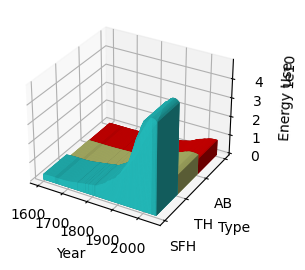

In [ ]:
#* TIME BY TYPE BY ENERGY

fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')

x = energy_use_vectors_concatenated.index
y = [1, 2, 3]
xx, yy = np.meshgrid(x, y)

xx = xx.flatten()
yy = yy.flatten()
zz = np.zeros(3 * 451)

d_x = np.ones(3 * 451)
d_y = np.ones(3 * 451)

energy_use_vectors_concatenated_np = energy_use_vectors_concatenated.to_numpy()

d_z = energy_use_vectors_concatenated_np.transpose().flatten()

colors = plt.cm.rainbow(np.tile(y, (451,1)).transpose().flatten()/3)

ax1.bar3d(xx, yy, zz, d_x, d_y, d_z, shade=True, color=colors)
ax1.set_xlabel('Year')
ax1.set_ylabel('Type')
ax1.set_yticklabels([0, 'SFH','TH','AB'])
ax1.set_zlabel('Energy Use')
plt.tight_layout()
plt.show()

In [ ]:
s_UFA_c_total = s_UFA_c_SFH + s_UFA_c_TH + s_UFA_c_AB

s_UFA_c_total


,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Year,,,,,,,,,,,,,,,,,,,,,
1600,1.633293e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1601,1.633235e+07,114100.122253,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1602,1.633171e+07,114096.030111,109818.825364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1603,1.633104e+07,114091.626681,109814.886769,105627.283293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1604,1.633031e+07,114086.890610,109810.648566,105623.495026,101525.473931,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,4.548479e-04,0.000004,0.000004,0.000005,0.000005,0.000006,0.000006,0.000007,0.000008,0.000009,...,4.402667e+06,4.377873e+06,4.346415e+06,4.326533e+06,4.288814e+06,4.269284e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2047,3.919760e-04,0.000003,0.000004,0.000004,0.000004,0.000005,0.000005,0.000006,0.000007,0.000007,...,4.402665e+06,4.377871e+06,4.346414e+06,4.326532e+06,4.288813e+06,4.269284e+06,4.241057e+06,0.000000e+00,0.000000e+00,0.000000e+00
2048,3.376321e-04,0.000003,0.000003,0.000003,0.000004,0.000004,0.000005,0.000005,0.000006,0.000006,...,4.402663e+06,4.377870e+06,4.346413e+06,4.326531e+06,4.288812e+06,4.269283e+06,4.241056e+06,4.203046e+06,0.000000e+00,0.000000e+00


In [ ]:
UFA_total = s_UFA_c_total.sum(axis=1)
UFA_total

Year
1600    1.633293e+07
1601    1.644645e+07
1602    1.655563e+07
1603    1.666057e+07
1604    1.676135e+07
            ...     
2046    4.519145e+08
2047    4.538565e+08
2048    4.557069e+08
2049    4.574795e+08
2050    4.591779e+08
Length: 451, dtype: float64

Text(0, 0.5, 'dwellings')

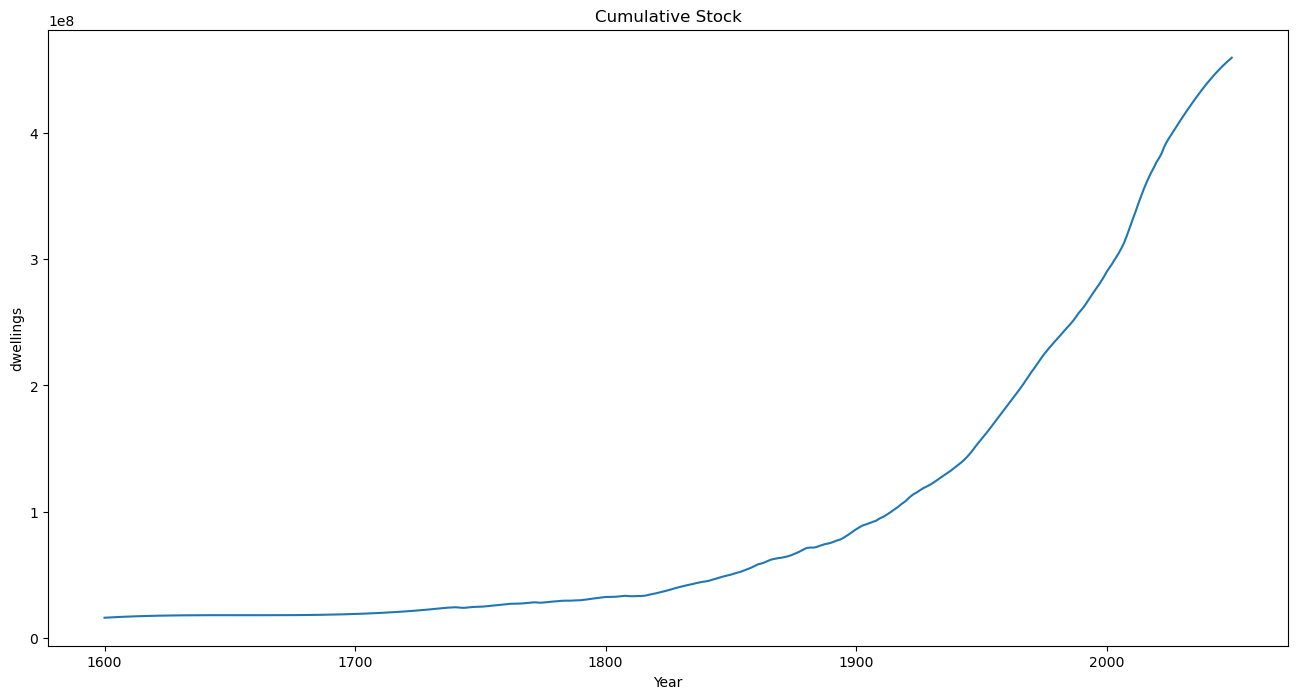

In [ ]:
# Plot total stock
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), UFA_total)
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

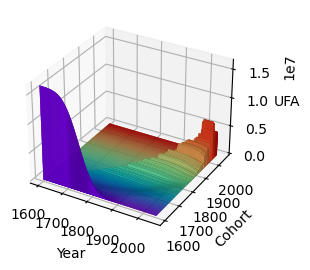

In [ ]:
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')

x = s_UFA_c_total.index
y = s_UFA_c_total.columns
xx, yy = np.meshgrid(x, y)

xx = xx.flatten()
yy = yy.flatten()
zz = np.zeros(451 * 451)

d_x = np.ones(451 * 451)
d_y = np.ones(451 * 451)

s_UFA_c_total_np = s_UFA_c_total.to_numpy()

d_z = s_UFA_c_total_np.transpose().flatten()

colors = plt.cm.rainbow(np.tile(y-1600, (451,1)).transpose().flatten()/451)

ax1.bar3d(xx, yy, zz, d_x, d_y, d_z, shade=True, color=colors)
ax1.set_xlabel('Year')
ax1.set_ylabel('Cohort')
ax1.set_zlabel('UFA')

plt.show()

# CODE FORMAT TO USE FOR EXPORTING GRAPHS

In [ ]:

#* Use this code to export finished graphs as jpegs which can then be added to the presentation slides

plt.savefig(
    directory_path / 'visualizations/name.jpeg', 
    bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

Calibration vs Validation Data - Stock

In [ ]:
s_SFH

array([  38636.27751903,   38905.03770149,   39163.77472594,
         39412.67643507,   39651.93067318,   39881.72528634,
         40102.24812235,   40313.6870309 ,   40516.22986361,
         40710.0644741 ,   40895.3787181 ,   41072.36045351,
         41241.19754052,   41402.07784169,   41555.18922205,
         41700.71954922,   41838.85669352,   41969.78852805,
         42093.7029289 ,   42210.78777517,   42321.23094921,
         42425.22033669,   42522.94382677,   42614.58931227,
         42700.34468984,   42780.39786011,   42854.93672788,
         42924.14920231,   42988.22319712,   43047.34663082,
         43101.70742689,   43151.49351403,   43196.89282642,
         43238.09330393,   43275.28289242,   43308.649544  ,
         43338.38121733,   43364.66587791,   43387.69149842,
         43407.64605902,   43424.71754773,   43439.09396078,
         43450.96330301,   43460.51358823,   43467.93283969,
         43473.40909048,   43477.130384  ,   43479.28477445,
         43480.0603273 ,

In [ ]:
stock_validation = pd.read_excel(
    directory_path / 'data' / 'Validation data' / 'Stock_calibration.xlsx',
    index_col=0)

stock_validation

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Single Family House (SFH),1211524,1215729,1223460,1230690,1239137,1248005,1255705,1263593,1271011,1279574,...,1312837,1320355,1327540,1334130,1340105,1345561,1350960,1356610,1362422,1366575
Terraced House (TH),116832,119543,122881,125491,128956,131739,134391,137653,139912,142582,...,157011,159762,163355,166722,169662,172198,174445,177575,180434,182442
Apartment Block (AB),24516,29393,30192,31335,32634,33772,35113,35825,36752,37571,...,41957,42956,44034,45047,45977,46903,47767,48562,49483,50095


(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000., 1400000., 1600000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

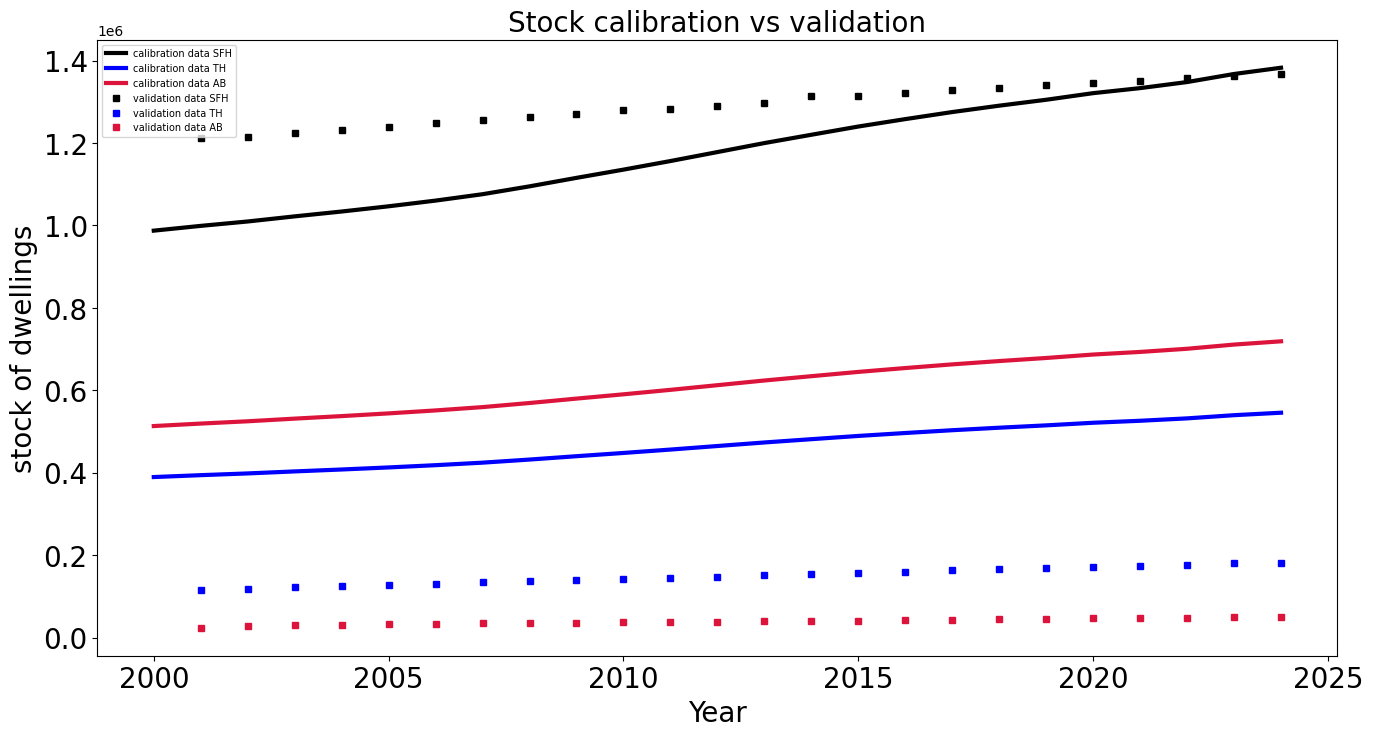

In [ ]:
stock_validation = pd.read_excel(
    directory_path / 'data' / 'Validation data' / 'Stock_calibration.xlsx',
    index_col=0).T

# stock by type

s_SFH_v = s_c_SFH_df.sum(axis=1)
s_TH_v = s_c_TH_df.sum(axis=1)
s_AB_v = s_c_AB_df.sum(axis=1)


plt.figure(figsize=(16, 8))
plt.plot(np.arange(2000,2025), s_SFH_v.loc['2000':'2024'], color='black', lw=3, label = f'calibration data SFH')
plt.plot(np.arange(2000,2025), s_TH_v.loc['2000':'2024'], color='blue', lw=3, label = f'calibration data TH')
plt.plot(np.arange(2000,2025), s_AB_v.loc['2000':'2024'], color='crimson', lw=3, label = f'calibration data AB')


plt.plot(stock_validation.index, stock_validation.loc[:,'Single Family House (SFH)'], 's', color = 'black', markersize = 5, label = f'validation data SFH')
plt.plot(stock_validation.index, stock_validation.loc[:,'Terraced House (TH)'], 's', color = 'blue', markersize = 5, label = f'validation data TH')
plt.plot(stock_validation.index, stock_validation.loc[:,'Apartment Block (AB)'], 's', color = 'crimson', markersize = 5, label = f'validation data AB')


plt.title('Stock calibration vs validation', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='upper left', fontsize=7)
plt.ylabel('stock of dwellings', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

Calibration vs Validation Data - Energy Use

In [ ]:
total_energy_use = energy_use_vector_SFH + energy_use_vector_TH + energy_use_vector_AB
total_energy_use

Year
1600    5.001540e+09
1601    5.036305e+09
1602    5.069749e+09
1603    5.101898e+09
1604    5.132777e+09
            ...     
2046    9.104072e+10
2047    9.083194e+10
2048    9.060423e+10
2049    9.035917e+10
2050    9.009721e+10
Length: 451, dtype: float64

In [ ]:
energy_validation = pd.read_excel(
    directory_path / 'data' / 'Validation data' / 'Energy_use_validation_data.xlsx',
    index_col=0)


stock_validation_total = stock_validation.sum(axis=1)
energy_validation_total = np.multiply(energy_validation,stock_validation_total)

# energy total
total_energy_use = energy_use_vector_SFH + energy_use_vector_TH + energy_use_vector_AB

plt.figure(figsize=(16, 8))
plt.plot(np.arange(1993,2012), total_energy_use.loc['1993':'2011'], color='crimson', lw=3, label = f'calibration data')
plt.plot(energy_validation.index, energy_validation, 's', color = 'black', markersize = 5, label = f'validation data')

plt.title('Energy Calibration vs Validation')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.ylabel('Energy Use kWh')

C:\Users\grace\AppData\Local\Temp\ipykernel_40956\3422576137.py:7: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  energy_validation_total = np.multiply(energy_validation,stock_validation_total)


ValueError: Unable to coerce to Series, length must be 1: given 24

Calibration vs Validation Data - Inflow

In [ ]:
inflow_validation = pd.read_excel(
    directory_path / 'data' / 'Validation data' / 'Inflow_validation_data.xlsx',
    index_col=0).T
inflow_validation

,Single Family House (SFH),Terraced House (TH),Apartment Block (AB)
2000,11048,2101,5724
2001,12172,1885,8090
2002,10129,1762,8965
2003,9215,1242,10069
2004,8901,1707,12201
2005,10150,2369,16334
2006,9674,1771,16299
2007,9880,2168,18046
2008,10185,1687,15988
2009,9105,1242,10652


In [ ]:
i_SFH_df

,0
Year,
1600,38653.051605
1601,270.263138
1602,260.350774
1603,250.633950
1604,241.113129
...,...
2046,16587.000139
2047,16501.098703
2048,16376.828285


In [ ]:
i_TH_df

,0
Year,
1600,38653.051605
1601,270.263138
1602,260.350774
1603,250.633950
1604,241.113129
...,...
2046,16587.000139
2047,16501.098703
2048,16376.828285


(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

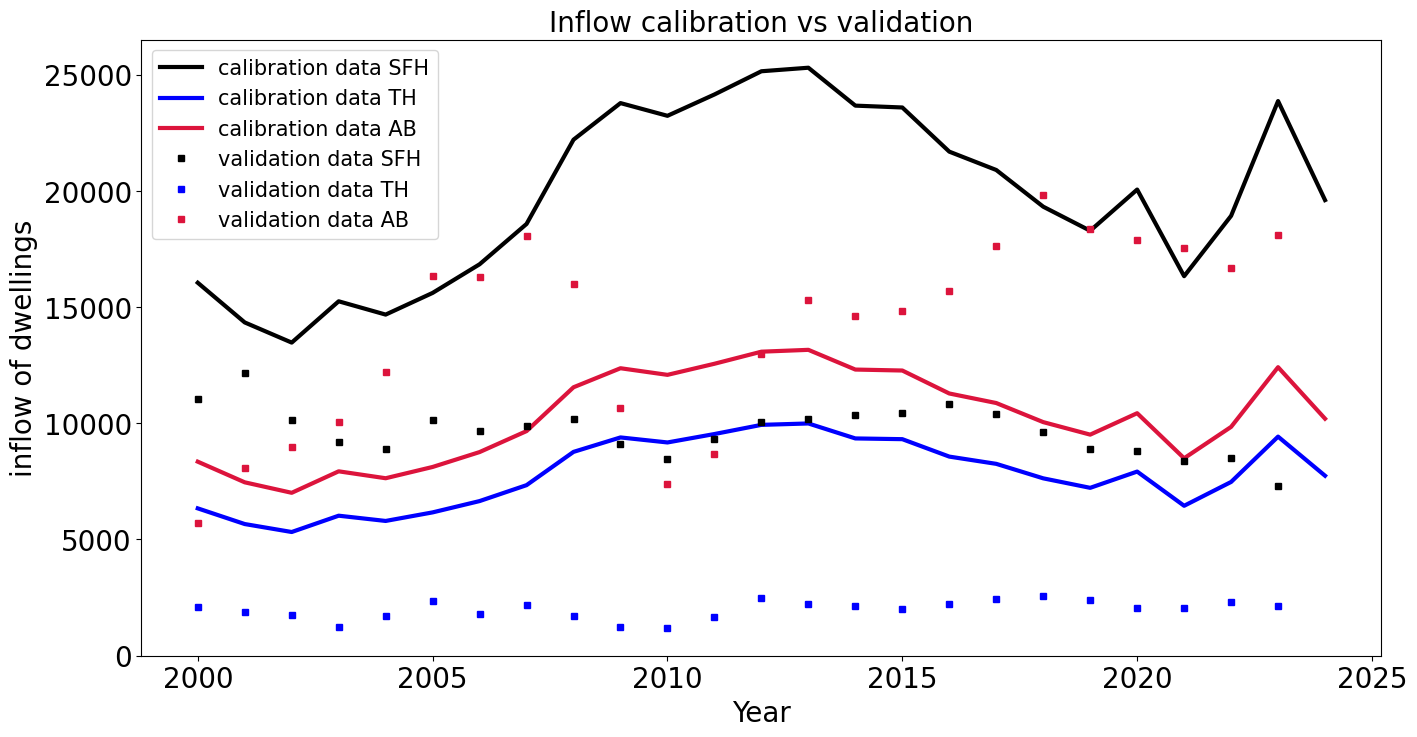

In [ ]:
inflow_validation = pd.read_excel(
    directory_path / 'data' / 'Validation data' / 'Inflow_validation_data.xlsx',
    index_col=0).T



# inflow by type


plt.figure(figsize=(16, 8))
plt.plot(np.arange(2000,2025), i_SFH_df.loc['2000':'2024'], color='black', lw=3, label = f'calibration data SFH')
plt.plot(np.arange(2000,2025), i_TH_df.loc['2000':'2024'], color='blue', lw=3, label = f'calibration data TH')
plt.plot(np.arange(2000,2025), i_AB_df.loc['2000':'2024'], color='crimson', lw=3, label = f'calibration data AB')


plt.plot(inflow_validation.index, inflow_validation.loc[:,'Single Family House (SFH)'], 's', color = 'black', markersize = 5, label = f'validation data SFH')
plt.plot(inflow_validation.index, inflow_validation.loc[:,'Terraced House (TH)'], 's', color = 'blue', markersize = 5, label = f'validation data TH')
plt.plot(inflow_validation.index, inflow_validation.loc[:,'Apartment Block (AB)'], 's', color = 'crimson', markersize = 5, label = f'validation data AB')


plt.title('Inflow calibration vs validation', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='upper left', fontsize=15)
plt.ylabel('inflow of dwellings', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


Calibration vs Validation Data - Outflow

In [ ]:
o_SFH_df

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Year,,,,,,,,,,,,,,,,,,,,,
1600,1.677409e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1601,1.385670e+00,1.172848e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1602,1.491078e+00,9.688642e-03,1.129832e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1603,1.603716e+00,1.042565e-02,9.333294e-03,1.087664e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1604,1.724015e+00,1.121322e-02,1.004327e-02,8.984955e-03,1.046347e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1.653537e-07,1.336274e-09,1.487076e-09,1.652974e-09,1.835210e-09,2.035085e-09,2.253964e-09,2.493271e-09,2.754479e-09,3.039115e-09,...,0.005029,0.003920,0.003042,0.002361,0.001820,0.006000,0.000000,0.000000,0.000000,0.000000
2047,1.429951e-07,1.156156e-09,1.287262e-09,1.431572e-09,1.590180e-09,1.764235e-09,1.954944e-09,2.163565e-09,2.391407e-09,2.639820e-09,...,0.006409,0.005008,0.003897,0.003033,0.002344,0.001814,0.005969,0.000000,0.000000,0.000000
2048,1.235991e-07,9.998239e-10,1.113750e-09,1.239217e-09,1.377189e-09,1.528681e-09,1.694760e-09,1.876537e-09,2.075171e-09,2.291860e-09,...,0.008145,0.006382,0.004979,0.003885,0.003010,0.002336,0.001805,0.005924,0.000000,0.000000


In [ ]:
o_TH_df

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

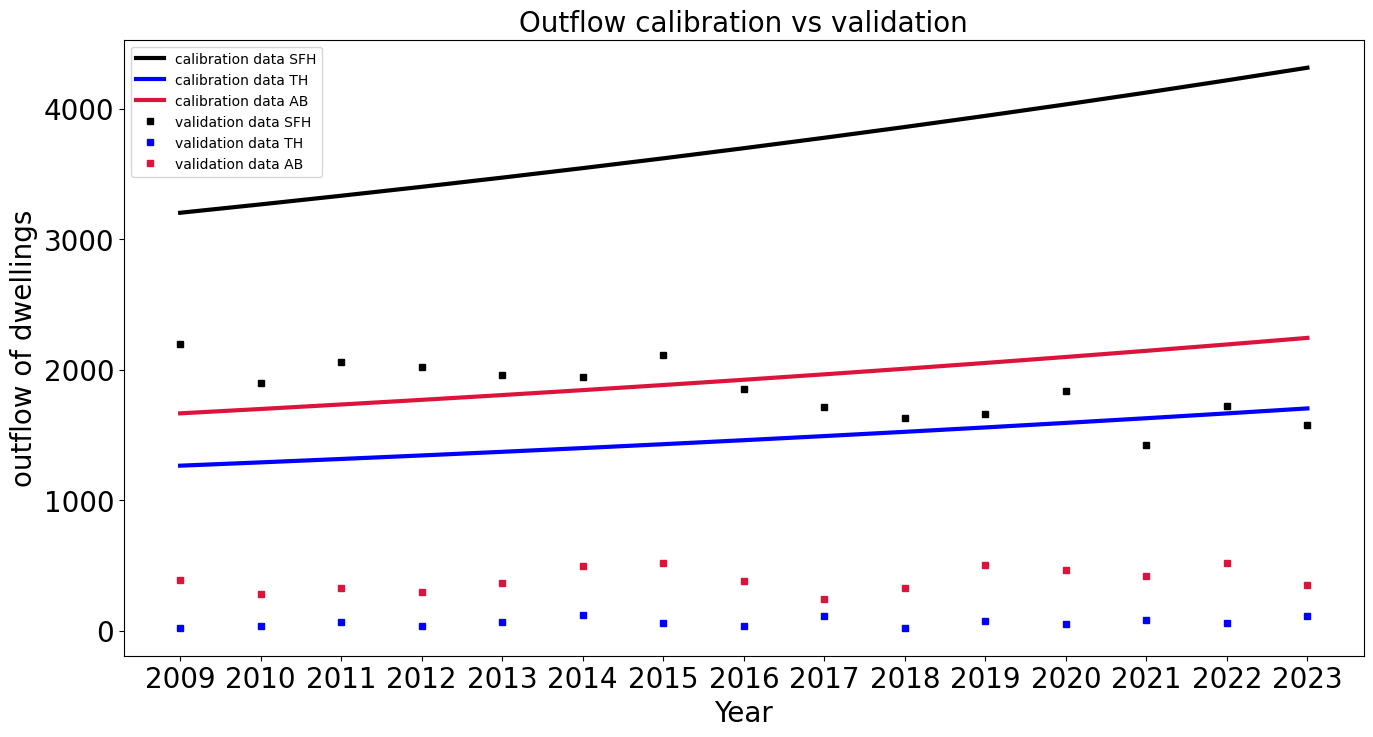

In [ ]:
outflow_validation = pd.read_excel(
    directory_path / 'data' / 'Validation data' / 'Outflow_validation_data.xlsx',
    index_col=0).T


# outflow by type
o_SFH_v = o_SFH_df.sum(axis=1)
o_TH_v = o_TH_df.sum(axis=1)
o_AB_v = o_AB_df.sum(axis=1)

plt.figure(figsize=(16, 8))
plt.plot(outflow_validation.index, o_SFH_v.loc['2009':'2023'], color='black', lw=3, label = f'calibration data SFH')
plt.plot(outflow_validation.index, o_TH_v.loc['2009':'2023'], color='blue', lw=3, label = f'calibration data TH')
plt.plot(outflow_validation.index, o_AB_v.loc['2009':'2023'], color='crimson', lw=3, label = f'calibration data AB')


plt.plot(outflow_validation.index, outflow_validation.loc[:,'Single Family House (SFH)'], 's', color = 'black', markersize = 5, label = f'validation data SFH')
plt.plot(outflow_validation.index, outflow_validation.loc[:,'Terraced House (TH)'], 's', color = 'blue', markersize = 5, label = f'validation data TH')
plt.plot(outflow_validation.index, outflow_validation.loc[:,'Apartment Block (AB)'], 's', color = 'crimson', markersize = 5, label = f'validation data AB')


plt.title('Outflow calibration vs validation', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='upper left', fontsize=10)
plt.ylabel('outflow of dwellings', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)